# **Delhivery Business Case**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The df team builds intelligence and capabilities using this df that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

### **Column Profiling:**
1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique ID for a particular route schedule
4. route_type – Transportation type
a. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck
is making no other pickups or drop-offs along the way
b. Carting: Handling system consisting of small vehicles (carts)
5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and
destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente – Destination ID
9. destination_name – Destination Name
10. od_start_time – Trip start time

11. od_end_time – Trip end time
12. start_scan_to_end_scan – Time taken to deliver from source to destination
13. is_cutoff – Unknown field
14. cutoff_factor – Unknown field
15. cutoff_timestamp – Unknown field
16. actual_distance_to_destination – Distance in kms between source and destination
warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
18. osrm_time – An open-source routing engine time calculator which computes the
shortest path between points in a given map (Includes usual traffic, distance through
major and minor roads) and gives the time (Cumulative)
19. osrm_distance – An open-source routing engine which computes the shortest path
between points in a given map (Includes usual traffic, distance through major and minor
roads) (Cumulative)
20. factor – Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the
package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the
package delivery
23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of
the package delivery
24. segment_factor – Unknown field

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [115]:
df=pd.read_csv("delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [116]:
print('Number of records in the dataset: ',df.shape[0])
print('Number of features in the dataset: ',df.shape[1])

Number of records in the dataset:  144867
Number of features in the dataset:  24


#### **Dropping Unknown Fields**
- Dropping is_cutoff, cutoff_factor, cutoff_timestamp, factor, segment_factor

In [117]:
# df.drop(['is_cutoff',"route_schedule_uuid", 'cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1)

### **Descriptive Statistics**

In [118]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [120]:
#check duplicates
df.duplicated().sum()

0

In [121]:
#checking null values
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

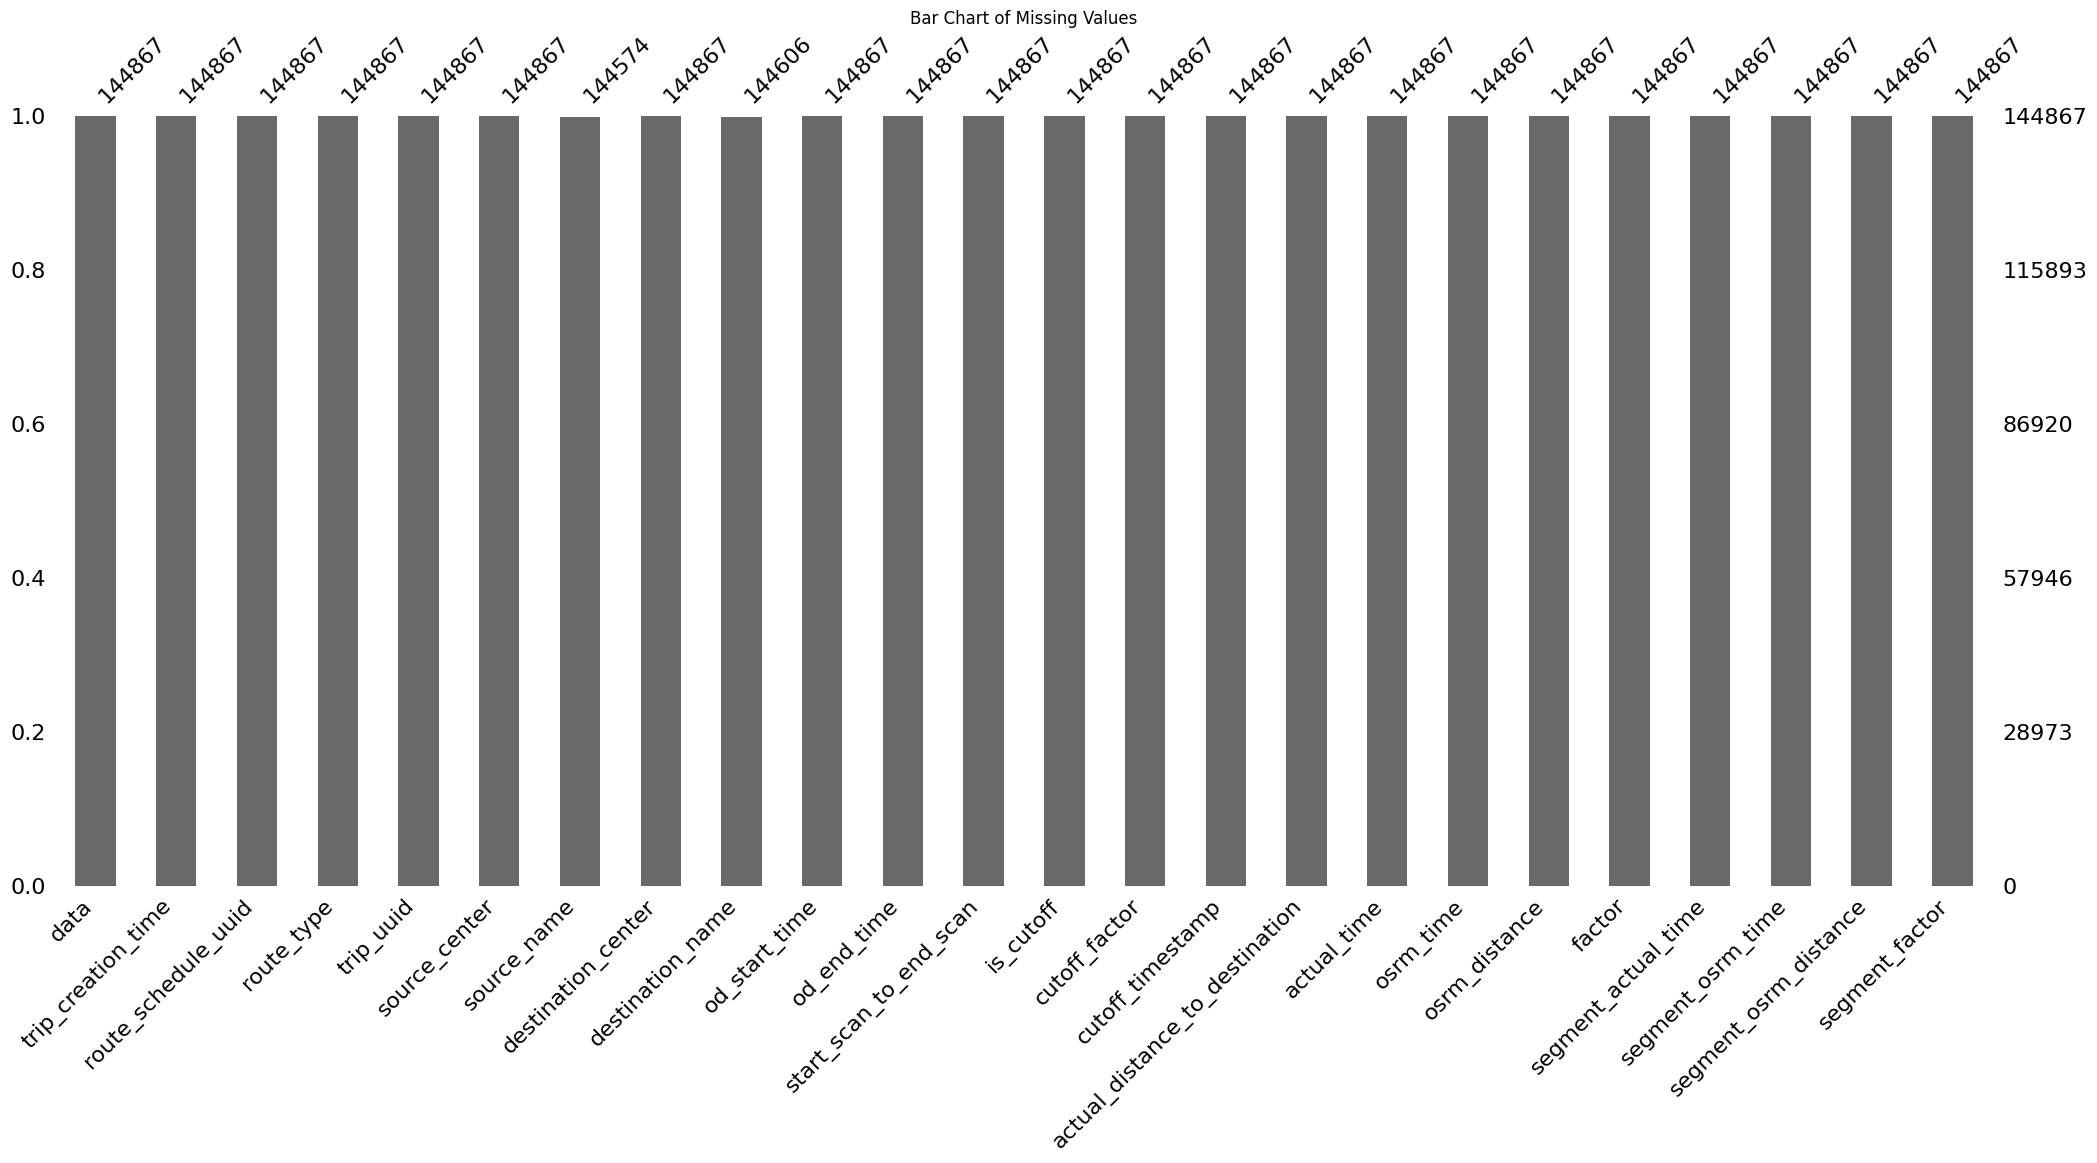

In [122]:
msno.bar(df)
plt.title('Bar Chart of Missing Values')
plt.show()

- There are 144574 non null values in source_name, 144606 non null values in destination_name
- There are 293 nulls in source_name and 261 in destination_name

In [123]:
df.dropna(inplace=True)

In [124]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

#### **Converting timestamps to datetime columns**
- trip_creation_time, od_start_time, cutoff_timestamp must be converted to datetime format

In [125]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'], format='%Y-%m-%d %H:%M:%S.%f')
df['od_start_time'] = pd.to_datetime(df['od_start_time'], format='%Y-%m-%d %H:%M:%S.%f')
df['od_end_time'] = pd.to_datetime(df['od_end_time'], format='%Y-%m-%d %H:%M:%S.%f')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

#### **Unique Values**

In [127]:
for i in df.columns:
    print(f"{i}: datatype is {df[i].dtype} and {df[i].nunique()} unique values ")
    print('The unique values are')
    print(df[i].unique())
    print('-'*90)

data: datatype is object and 2 unique values 
The unique values are
['training' 'test']
------------------------------------------------------------------------------------------
trip_creation_time: datatype is datetime64[ns] and 14787 unique values 
The unique values are
<DatetimeArray>
['2018-09-20 02:35:36.476840', '2018-09-23 06:42:06.021680',
 '2018-09-14 15:42:46.437249', '2018-09-13 20:44:19.424489',
 '2018-09-29 22:21:45.149226', '2018-09-17 21:26:00.454695',
 '2018-09-12 01:33:48.711350', '2018-10-01 16:00:45.719099',
 '2018-09-27 14:16:14.819357', '2018-09-13 16:41:41.992300',
 ...
 '2018-09-13 20:47:45.942988', '2018-10-01 19:56:20.111591',
 '2018-09-23 01:31:09.129173', '2018-10-01 18:17:37.047270',
 '2018-09-26 14:05:52.096792', '2018-09-26 19:50:29.657378',
 '2018-09-14 18:45:34.164734', '2018-09-22 11:30:41.399439',
 '2018-09-17 11:35:28.838714', '2018-09-20 16:24:28.436231']
Length: 14787, dtype: datetime64[ns]
-----------------------------------------------------------

In [128]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:09.454117120,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,2018-09-17 02:46:11.004421120,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,2018-09-22 03:36:19.186585088,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000
std,NaN,NaN,NaN,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804


In [129]:
df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,...,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
unique,2,NaN,1497,2,14787,1496,1496,1466,1466,NaN,...,92894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,NaN,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),NaN,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104632,NaN,1812,99132,101,23267,23267,15192,15192,NaN,...,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2018-09-22 13:05:09.454117120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 17:32:42.435769344,...,NaN,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
min,NaN,2018-09-12 00:00:16.535741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-12 00:00:16.535741,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,NaN,2018-09-17 02:46:11.004421120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-17 07:37:35.014584832,...,NaN,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,NaN,2018-09-22 03:36:19.186585088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 07:35:23.038482944,...,NaN,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,NaN,2018-09-27 17:53:19.027942912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-27 22:01:30.861209088,...,NaN,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,NaN,2018-10-03 23:59:42.701692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-06 04:27:23.392375,...,NaN,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


## **EDA**

In [204]:
cp = ['gray','red','dimgrey','tomato','dimgray','orangered','k','salmon','gray','red','dimgrey','tomato','dimgray','orangered','k','salmon']

C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\951363175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x=df['data'].value_counts().index, y=df['data'].value_counts(), palette=cp)
C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\951363175.py:3: UserWarning: The palette list has more values (16) than needed (2), which may not be intended.
  a = sns.barplot(x=df['data'].value_counts().index, y=df['data'].value_counts(), palette=cp)
C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\951363175.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=df['route_type'].value_counts().index, y=df['route_type'].value_counts(), palette=cp)
C:\Users\mohit\AppData\Local\Temp\ipykernel_111

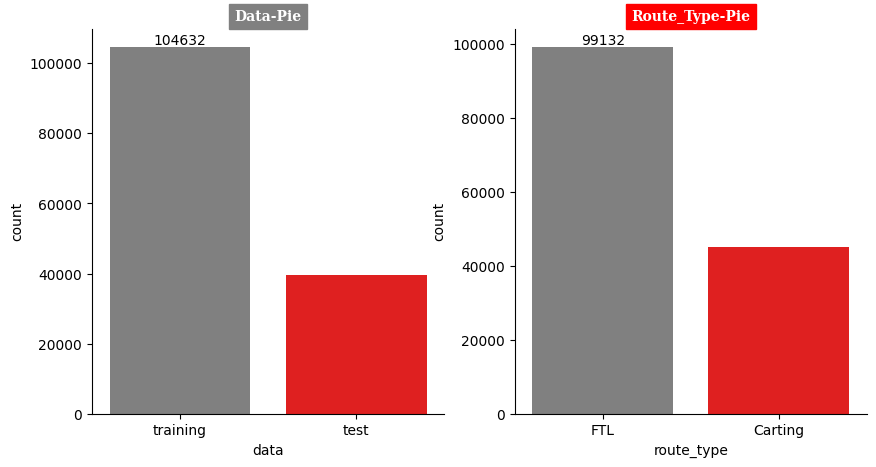

In [208]:
plt.figure(figsize=(10,5))
plt.subplot(121)
a = sns.barplot(x=df['data'].value_counts().index, y=df['data'].value_counts(), palette=cp)
a.bar_label(a.containers[0], label_type='edge',fmt='%d')
plt.title('Data-Pie',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')

plt.subplot(122)
b = sns.barplot(x=df['route_type'].value_counts().index, y=df['route_type'].value_counts(), palette=cp)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Route_Type-Pie',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')
sns.despine()
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\3990298282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='data',x='osrm_time',palette=cp)
C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\3990298282.py:5: UserWarning: The palette list has more values (16) than needed (2), which may not be intended.
  sns.boxplot(data=df,y='data',x='osrm_time',palette=cp)
C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\3990298282.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='route_type',x='actual_time',palette=cp)
C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\3990298282.py:9: UserWarning: The palette list has more values (16) than needed (2), which may not be intende

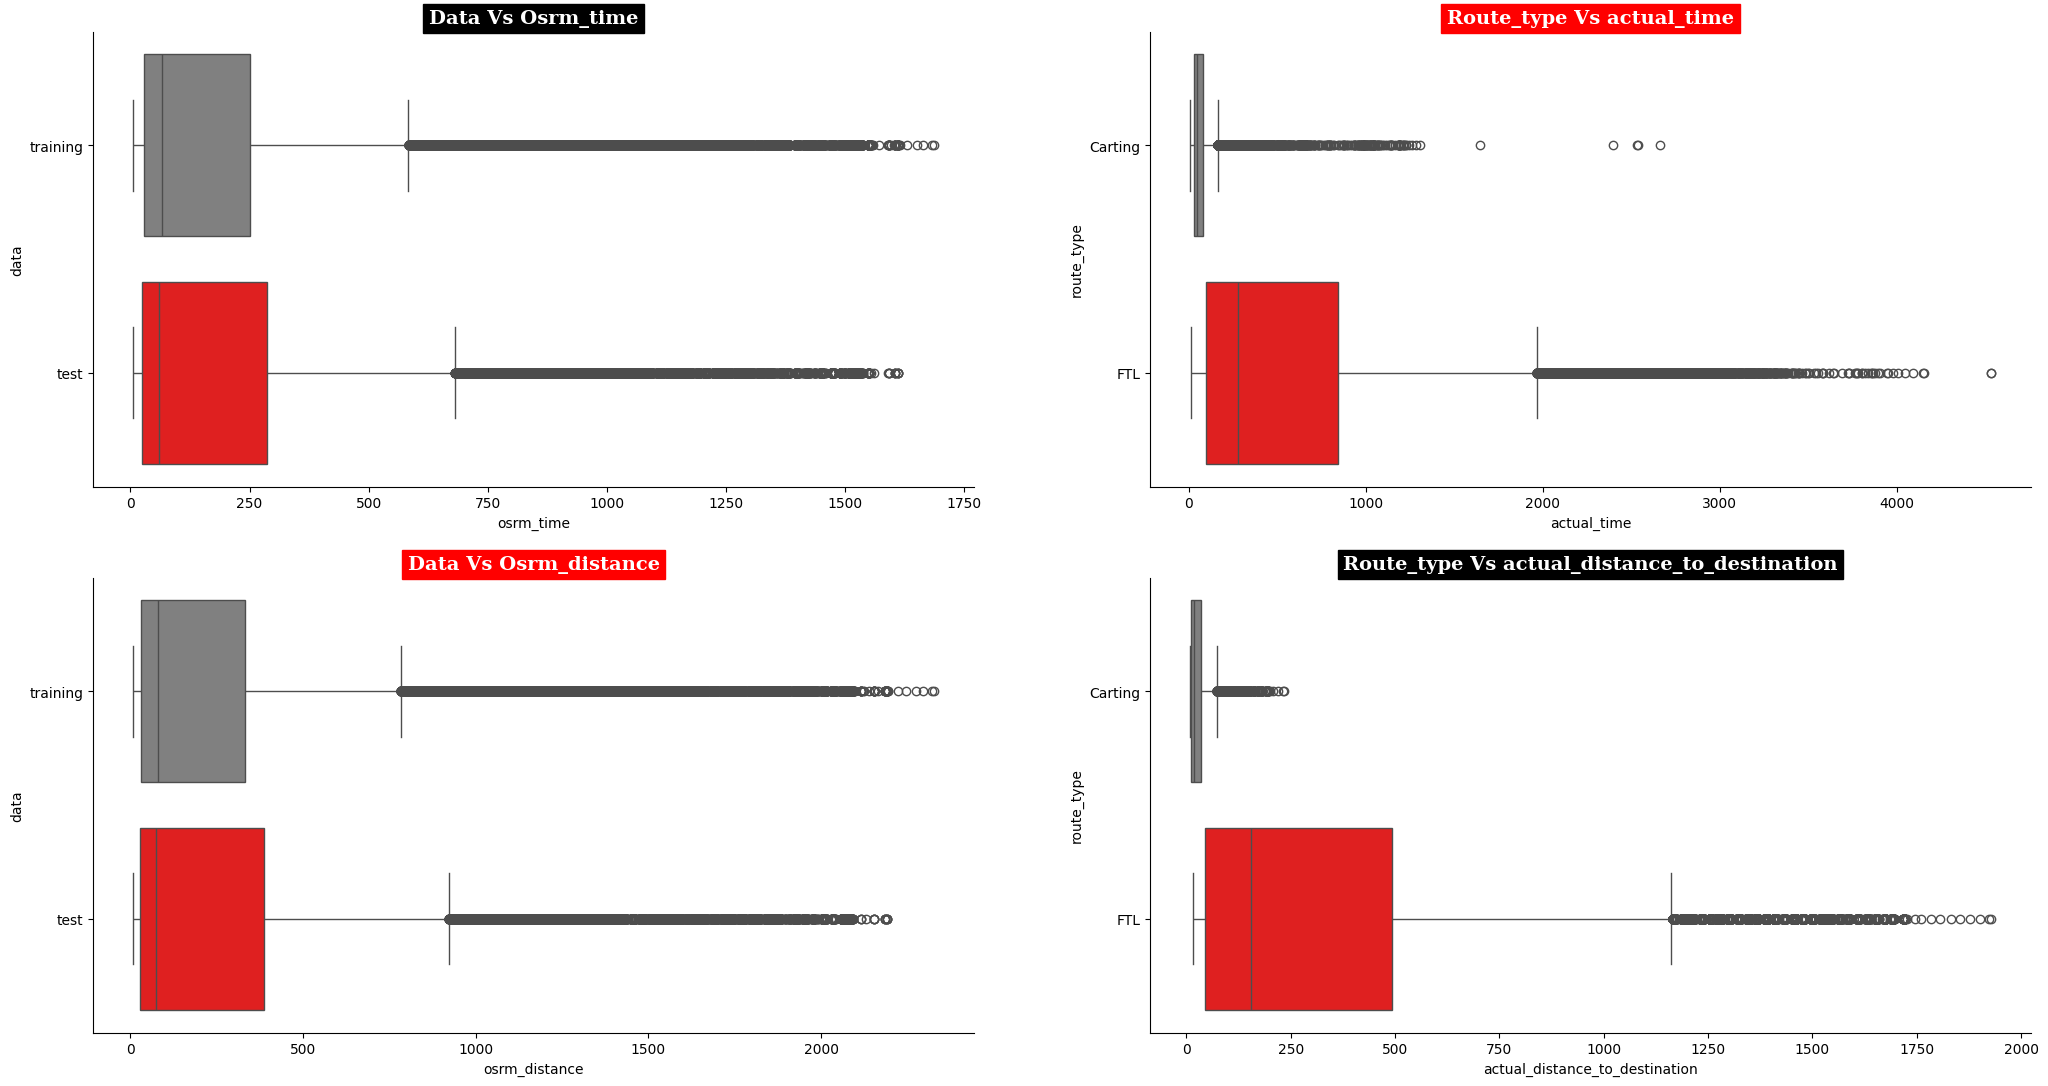

In [210]:
plt.figure(figsize=(25,13))
plt.style.use('default')

plt.subplot(221)
sns.boxplot(data=df,y='data',x='osrm_time',palette=cp)
plt.title('Data Vs Osrm_time',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')

plt.subplot(222)
sns.boxplot(data=df,y='route_type',x='actual_time',palette=cp)
plt.title('Route_type Vs actual_time',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')

plt.subplot(223)
sns.boxplot(data=df,y='data',x='osrm_distance',palette=cp)
plt.title('Data Vs Osrm_distance',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')

plt.subplot(224)
sns.boxplot(data=df,y='route_type',x='actual_distance_to_destination',palette=cp)
plt.title('Route_type Vs actual_distance_to_destination',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
sns.despine()
plt.show()

### **Insights**
- FTL route type has more actual time compared to Carting. This can also be since FTL is used a lot more than carting in the data available to us
- FTL route type has more actual distance compared to Carting. This can also be since FTL is used a lot more than carting in the data available to us


### **Merging rows** 

In [130]:
df['segment_key'] = df['trip_uuid'] + "_" + df['source_center'] + "_" + df['destination_center']
df['segment_key']

0         trip-153741093647649320_IND388121AAA_IND388620AAB
1         trip-153741093647649320_IND388121AAA_IND388620AAB
2         trip-153741093647649320_IND388121AAA_IND388620AAB
3         trip-153741093647649320_IND388121AAA_IND388620AAB
4         trip-153741093647649320_IND388121AAA_IND388620AAB
                                ...                        
144862    trip-153746066843555182_IND131028AAB_IND000000ACB
144863    trip-153746066843555182_IND131028AAB_IND000000ACB
144864    trip-153746066843555182_IND131028AAB_IND000000ACB
144865    trip-153746066843555182_IND131028AAB_IND000000ACB
144866    trip-153746066843555182_IND131028AAB_IND000000ACB
Name: segment_key, Length: 144316, dtype: object

In [131]:
df['segment_actual_time_sum']=df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum']=df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum']=df.groupby('segment_key')['segment_osrm_time'].cumsum()

df[['segment_actual_time_sum','segment_osrm_distance_sum','segment_osrm_time_sum']]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [132]:
# Step 1: Define the create_segment_dict to specify aggregation rules
create_segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}

# Assuming df is the dataframe you are working with

# Step 2: Group by 'segment_key' and apply the aggregation functions
df_segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()

# Step 3: Sort the resulting DataFrame first by 'segment_key', then by 'od_end_time'
df_segment = df_segment.sort_values(by=['segment_key', 'od_end_time'], ascending=[True, True])

df_segment


,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303


### **Feature Engineering**

In [133]:
df_segment['od_total_time']=(df_segment['od_end_time'] - df_segment['od_start_time'])
df_segment['od_time_diff_hour'] = (df_segment['od_total_time']).dt.total_seconds()/3600
df_segment

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205,0 days 21:00:36.265275,21.010074
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528,0 days 16:39:30.322728,16.658423
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995,0 days 00:58:49.943264,0.980540
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899,0 days 02:02:46.769161,2.046325
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408,0 days 13:54:38.335721,13.910649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,...,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431,0 days 01:02:06.911603,1.035253
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,...,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869,0 days 01:31:05.267810,1.518130
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,...,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184,0 days 00:44:10.464194,0.736240
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,...,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303,0 days 04:47:28.440393,4.791233


In [134]:
de=df_segment.copy()
de.sample()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour
13874,trip-153765272272179691_IND842001AAA_IND845412AAB,trip-153765272272179691,training,FTL,2018-09-22 21:45:22.722059,Muzaffrpur_Bbganj_I (Bihar),Chakia_Wardno10_D (Bihar),2018-09-22 21:45:22.722059,2018-09-23 00:08:24.368592,143.0,...,34.0,49.1005,77.0,34.0,49.1005,77.0,34.0,49.1005,0 days 02:23:01.646533,2.383791


In [135]:
import re
def extract_info(name):
    pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
    match = re.match(pattern, name)
    if match:
        city = match.group('city').strip()
        place = match.group('place').strip() if match.group('place') else city
        state = match.group('state').strip()
        return city, place, state
    else:
        return None, None, None

In [136]:
de[['source_city', 'source_place', 'source_state']] = de['source_name'].apply(lambda x: pd.Series(extract_info(x)))
de[['destination_city', 'destination_place', 'destination_state']] = de['destination_name'].apply(lambda x: pd.Series(extract_info(x)))

In [137]:
de.sample()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour,source_city,source_place,source_state,destination_city,destination_place,destination_state
9794,trip-153738952122220126_IND742101AAC_IND731237AAB,trip-153738952122220126,training,Carting,2018-09-19 20:38:41.222469,Baharampur_Chuanpur_I (West Bengal),Morgram_Kntgorya_D (West Bengal),2018-09-19 20:38:41.222469,2018-09-19 22:57:27.888025,138.0,...,25.0,38.5312,0 days 02:18:46.665556,2.312963,Baharampur,Chuanpur_I,West Bengal,Morgram,Kntgorya_D,West Bengal


In [138]:
de[(de['source_place']=='') | (de['destination_place']=='')]

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour,source_city,source_place,source_state,destination_city,destination_place,destination_state
7,trip-153671052974046625_IND583101AAA_IND583201AAA,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,...,45.0,63.6461,0 days 02:32:00.774868,2.533549,Bellary,Dc,Karnataka,Hospet,,Karnataka
9,trip-153671052974046625_IND583201AAA_IND583119AAA,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,80.0,...,26.0,29.5697,0 days 01:20:32.598828,1.342389,Hospet,,Karnataka,Sandur,WrdN1DPP_D,Karnataka
19,trip-153671110078355292_IND121004AAB_IND121001AAA,trip-153671110078355292,training,Carting,2018-09-12 00:11:40.783923,FBD_Balabhgarh_DPC (Haryana),Faridabad (Haryana),2018-09-12 00:11:40.783923,2018-09-12 00:50:10.814399,38.0,...,9.0,10.8159,0 days 00:38:30.030476,0.641675,FBD,Balabhgarh_DPC,Haryana,Faridabad,,Haryana
33,trip-153671173668736946_IND110043AAA_IND110078AAA,trip-153671173668736946,training,Carting,2018-09-12 00:22:16.687619,Delhi_Nangli_IP (Delhi),Janakpuri (Delhi),2018-09-12 00:22:16.687619,2018-09-12 01:29:19.277412,67.0,...,25.0,22.6548,0 days 01:07:02.589793,1.117386,Delhi,Nangli_IP,Delhi,Janakpuri,,Delhi
80,trip-153671320807895983_IND121004AAB_IND121102AAA,trip-153671320807895983,training,Carting,2018-09-12 00:46:48.079257,FBD_Balabhgarh_DPC (Haryana),Palwal (Haryana),2018-09-12 00:46:48.079257,2018-09-12 01:53:32.471405,66.0,...,27.0,39.7244,0 days 01:06:44.392148,1.112331,FBD,Balabhgarh_DPC,Haryana,Palwal,,Haryana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26118,trip-153860849934816308_IND110078AAA_IND110043AAA,trip-153860849934816308,test,Carting,2018-10-03 23:14:59.348414,Janakpuri (Delhi),Delhi_Nangli_IP (Delhi),2018-10-04 01:32:14.530264,2018-10-04 03:05:32.479193,93.0,...,24.0,18.5128,0 days 01:33:17.948929,1.554986,Janakpuri,,Delhi,Delhi,Nangli_IP,Delhi
26153,trip-153860958923357924_IND842003AAB_IND482002AAA,trip-153860958923357924,test,Carting,2018-10-03 23:33:09.233829,Jabalpur_Adhartal_IP (Madhya Pradesh),Jabalpur (Madhya Pradesh),2018-10-03 23:33:09.233829,2018-10-04 07:48:23.711056,495.0,...,8.0,10.5521,0 days 08:15:14.477227,8.254021,Jabalpur,Adhartal_IP,Madhya Pradesh,Jabalpur,,Madhya Pradesh
26180,trip-153861007249500192_IND842001AAA_IND846004AAA,trip-153861007249500192,test,FTL,2018-10-03 23:41:12.495257,Muzaffrpur_Bbganj_I (Bihar),Darbhanga (Bihar),2018-10-03 23:41:12.495257,2018-10-04 02:17:56.235080,156.0,...,49.0,68.2751,0 days 02:36:43.739823,2.612150,Muzaffrpur,Bbganj_I,Bihar,Darbhanga,,Bihar
26181,trip-153861007249500192_IND846004AAA_IND847103AAA,trip-153861007249500192,test,FTL,2018-10-03 23:41:12.495257,Darbhanga (Bihar),Benipur_Javahar_D (Bihar),2018-10-04 02:17:56.235080,2018-10-04 04:20:42.531207,122.0,...,23.0,25.5966,0 days 02:02:46.296127,2.046193,Darbhanga,,Bihar,Benipur,Javahar_D,Bihar


In [139]:
de.loc[de['source_place']=='','source_place']=de['source_city']
de.loc[de['destination_place']=='','destination_place']=de['destination_city']

In [140]:
de[de.source_place.isna()]

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour,source_city,source_place,source_state,destination_city,destination_place,destination_state


In [141]:
cols=['source_city','source_place','source_state']
for col in cols:
    print(col+' Unique Values')
    print(de[col].unique())
    print(f'{col} has {de[col].nunique()} number of unique values')
    print('-'*100)


source_city Unique Values
['Kanpur' 'Bhopal' 'Doddablpur' ... 'Mahasamund' 'Badkulla' 'Kapadvanj']
source_city has 1240 number of unique values
----------------------------------------------------------------------------------------------------
source_place Unique Values
['Central_H_6' 'Trnsport_H' 'ChikaDPP_D' ... 'Bhaluahi_D' 'Thikiri_D'
 'RajpurRD_D']
source_place has 1246 number of unique values
----------------------------------------------------------------------------------------------------
source_state Unique Values
['Uttar Pradesh' 'Madhya Pradesh' 'Karnataka' 'Haryana' 'Maharashtra'
 'Tamil Nadu' 'Gujarat' 'Delhi' 'Telangana' 'Andhra Pradesh' 'Rajasthan'
 'Assam' 'West Bengal' 'Punjab' 'Chandigarh' 'Goa' 'Uttarakhand'
 'Jharkhand' 'Pondicherry' 'Orissa' 'Himachal Pradesh' 'Kerala'
 'Arunachal Pradesh' 'Bihar' 'Meghalaya' 'Chhattisgarh' 'Jammu & Kashmir'
 'Dadra and Nagar Haveli' 'Mizoram' 'Tripura' 'Nagaland']
source_state has 31 number of unique values
---------------------

C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\945280031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\945280031.py:5: UserWarning: 
The palette list has fewer values (16) than needed (31) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)


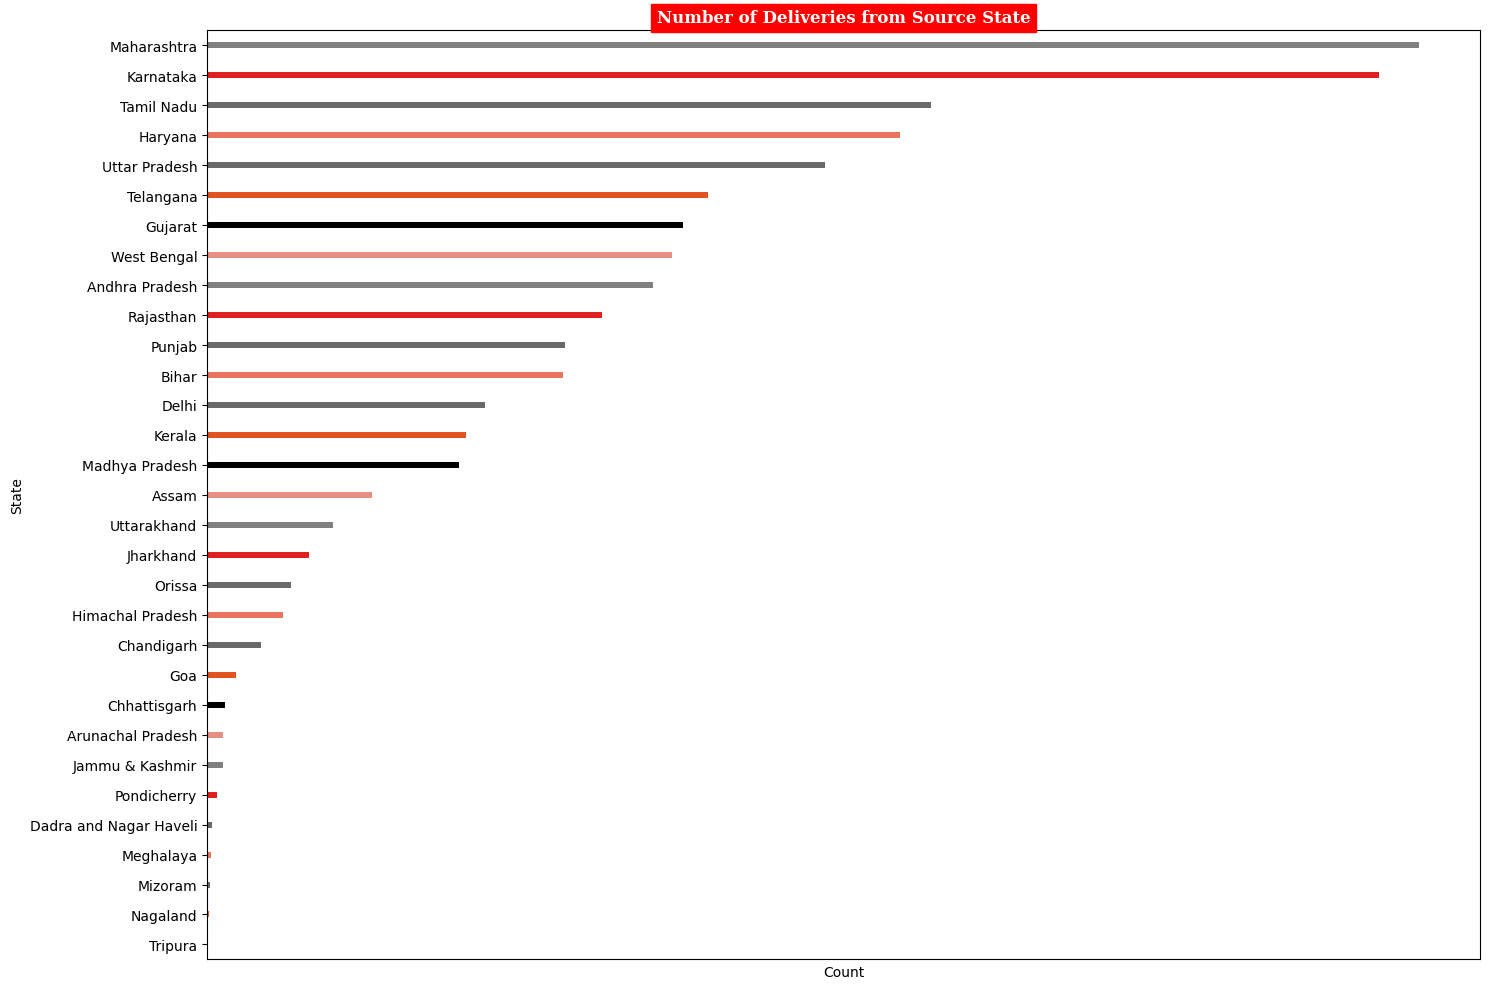

In [143]:
state_counts = de['source_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\1697114681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\1697114681.py:5: UserWarning: 
The palette list has fewer values (16) than needed (30) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)


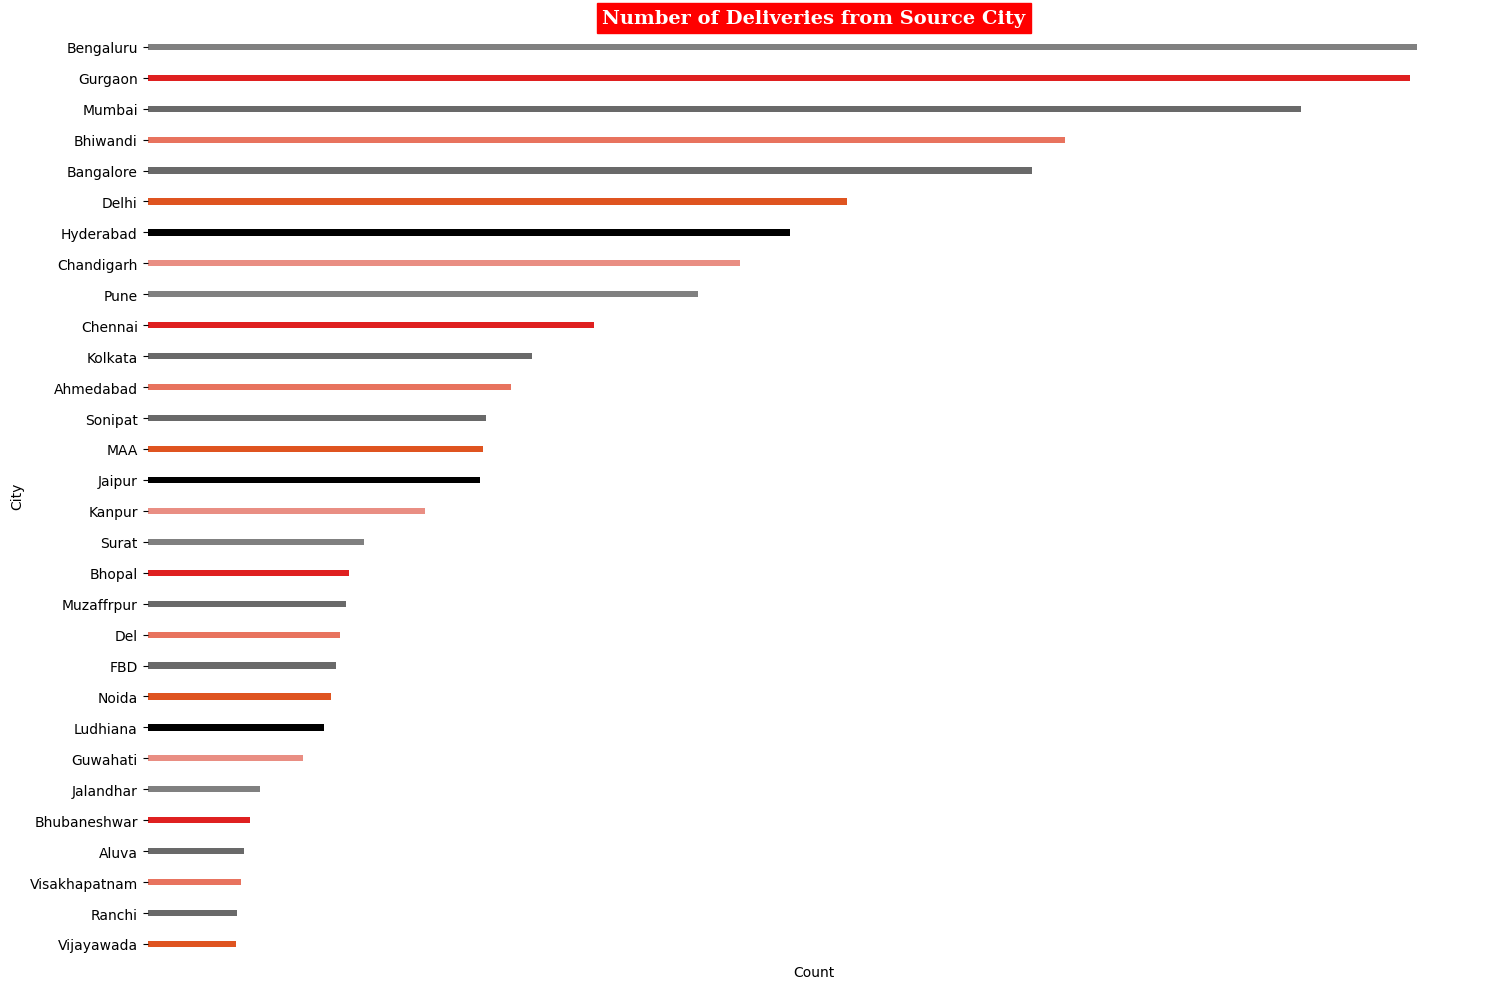

In [144]:
city_counts = de['source_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

### **Insights:**
- Source states like `Maharastra, Karnataka, Tamil Nadu, Haryana, Uttar Pradesh` are the top 5 state contributors where maximum bookings are placed to deliver 
- Source cities like `Bengaluru, Gurgaon, Mumbai, Bhiwandi, Delhi` are the top 5 city wise contributors where maximum bookings are placed to deliver

In [145]:
cols=['destination_city','destination_place','destination_state']
for col in cols:
    print(col+' Unique Values')
    print(de[col].unique())
    print(f'{col} has {de[col].nunique()} number of unique values')
    print('-'*100)

destination_city Unique Values
['Gurgaon' 'Kanpur' 'Chikblapur' ... 'Ranaghat' 'Kapadvanj' 'Lunawada']
destination_city has 1237 number of unique values
----------------------------------------------------------------------------------------------------
destination_place Unique Values
['Bilaspur_HB' 'Central_H_6' 'ShntiSgr_D' ... 'AnadiDPP_D' 'ArickDPP_D'
 'VrdhriRD_D']
destination_place has 1217 number of unique values
----------------------------------------------------------------------------------------------------
destination_state Unique Values
['Haryana' 'Uttar Pradesh' 'Karnataka' 'Punjab' 'Maharashtra' 'Tamil Nadu'
 'Gujarat' 'Delhi' 'Andhra Pradesh' 'Telangana' 'Rajasthan'
 'Madhya Pradesh' 'Assam' 'West Bengal' 'Chandigarh'
 'Dadra and Nagar Haveli' 'Orissa' 'Uttarakhand' 'Bihar' 'Jharkhand'
 'Pondicherry' 'Goa' 'Himachal Pradesh' 'Kerala' 'Arunachal Pradesh'
 'Mizoram' 'Chhattisgarh' 'Jammu & Kashmir' 'Meghalaya' 'Nagaland'
 'Tripura' 'Daman & Diu']
destination_state has 32

C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\2895460710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\2895460710.py:5: UserWarning: 
The palette list has fewer values (16) than needed (32) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)


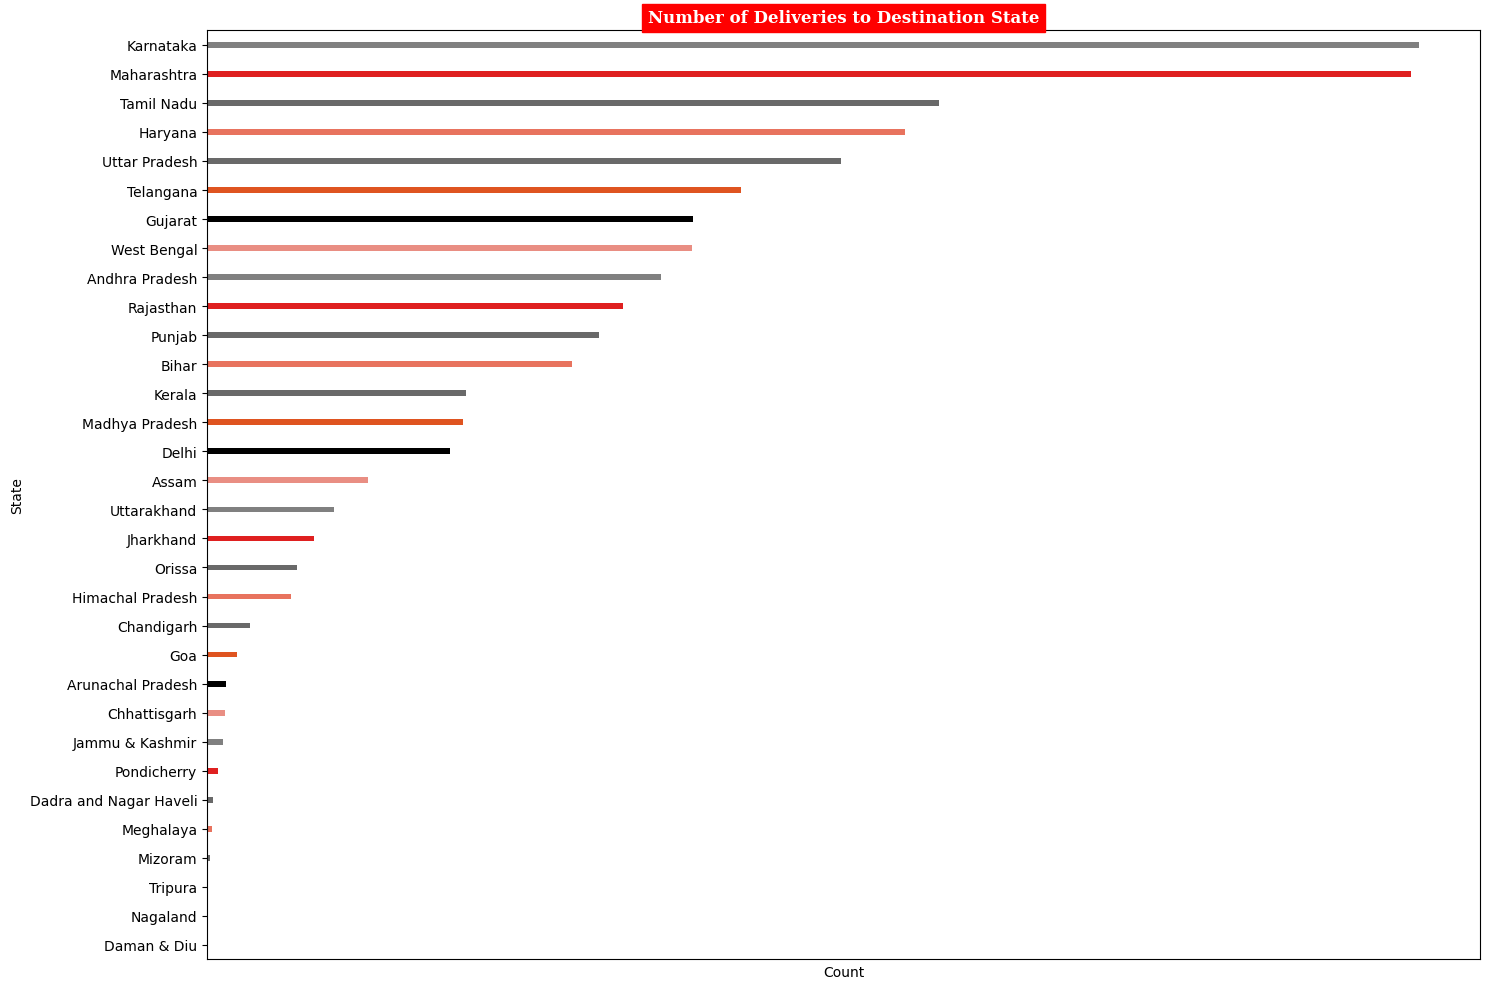

In [146]:
state_counts = de['destination_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\3820357651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\3820357651.py:5: UserWarning: 
The palette list has fewer values (16) than needed (30) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)


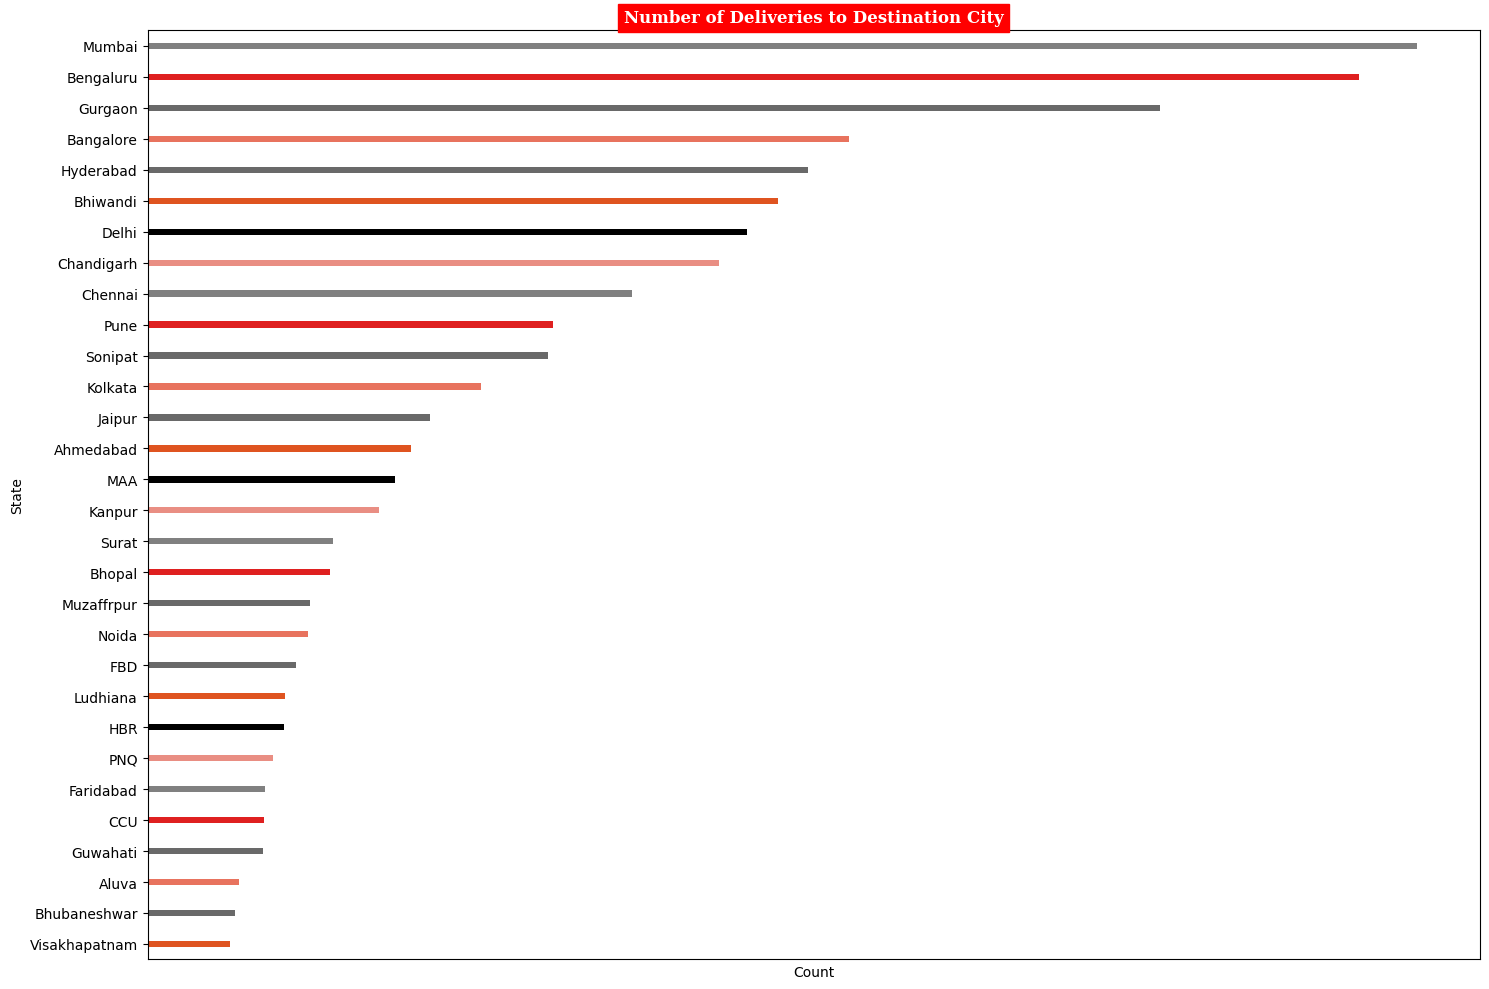

In [147]:
state_counts = de['destination_city'].value_counts().to_frame().reset_index()[:30]
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination City',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
plt.show()

### **Insights:**
- States like `Karnataka, Maharashtra, Tamil Nadu, Haryana, and Uttar Pradesh` where maximum packages are received state wise
- Cities like `Mumbai, Bengaluru, Gurgaon, Hyderabad, Bhiwandi` where maximum packages are received in city wise

In [148]:
de['trip_creation_month'] = de['trip_creation_time'].dt.month
de['trip_creation_year'] = de['trip_creation_time'].dt.year
de['trip_creation_day'] = de['trip_creation_time'].dt.day
de['trip_creation_hour'] = de['trip_creation_time'].dt.hour
de['trip_creation_weekday'] = de['trip_creation_time'].dt.weekday
de['trip_creation_week'] = de['trip_creation_time'].dt.isocalendar().week
de['trip_creation_day_week'] = de['trip_creation_time'].dt.day_name()
de.head(5)

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_city,destination_place,destination_state,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,trip_creation_day_week
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,Gurgaon,Bilaspur_HB,Haryana,9,2018,12,0,2,37,Wednesday
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,Kanpur,Central_H_6,Uttar Pradesh,9,2018,12,0,2,37,Wednesday
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,Chikblapur,ShntiSgr_D,Karnataka,9,2018,12,0,2,37,Wednesday
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,Doddablpur,ChikaDPP_D,Karnataka,9,2018,12,0,2,37,Wednesday
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,Chandigarh,Mehmdpur_H,Punjab,9,2018,12,0,2,37,Wednesday


## **In depth Analysis**

In [149]:
new_df = de.copy()
create_trip_dict={
  'data' : 'first',
  'route_type' : 'first',
  'od_start_time':'first',
  'od_end_time':'last',
  'od_time_diff_hour' : 'sum',
  'trip_creation_time' : 'first',
  'trip_creation_month' : 'first',
  'trip_creation_year' : 'first',
  'trip_creation_day' : 'first',
  'trip_creation_hour' : 'first',
  'trip_creation_weekday' : 'first',
  'trip_creation_week' : 'first',
  'trip_creation_day_week':'first',
  'start_scan_to_end_scan' : 'sum',
  'actual_distance_to_destination' : 'sum',
  'actual_time' : 'sum',
  'osrm_time' : 'sum',
  'osrm_distance' : 'sum',
  'segment_actual_time': 'sum',
  'segment_osrm_time': 'sum',
  'segment_osrm_distance': 'sum',
  'segment_actual_time_sum': 'sum',
  'segment_osrm_time_sum': 'sum',
  'segment_osrm_distance_sum': 'sum',
  'source_name': 'first',
  'source_city':'first', 
  'source_state':'first', 
  'source_place':'first',
  'destination_name': 'first',
  'destination_city':'first',
  'destination_state':'first',
  'destination_place':'first'
  }


In [150]:
trip_agg_df = new_df.groupby('trip_uuid').agg(create_trip_dict).reset_index()
trip_agg_df

,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,...,segment_osrm_time_sum,segment_osrm_distance_sum,source_name,source_city,source_state,source_place,destination_name,destination_city,destination_state,destination_place
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.668497,2018-09-12 00:00:16.535741,9,2018,12,...,1008.0,1320.4733,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central_H_6,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur_HB
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,9,2018,12,...,65.0,84.1894,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,Karnataka,ChikaDPP_D,Chikblapur_ShntiSgr_D (Karnataka),Chikblapur,Karnataka,ShntiSgr_D
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,65.572709,2018-09-12 00:00:33.691250,9,2018,12,...,1941.0,2545.2678,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur_HB,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur_H
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,9,2018,12,...,16.0,19.8766,Mumbai Hub (Maharashtra),Mumbai,Maharashtra,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd_IP
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.972484,2018-09-12 00:02:09.740725,9,2018,12,...,115.0,146.7919,Bellary_Dc (Karnataka),Bellary,Karnataka,Dc,Hospet (Karnataka),Hospet,Karnataka,Hospet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,4.300482,2018-10-03 23:55:56.258533,10,2018,3,...,62.0,64.8551,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur_H,Zirakpur_DC (Punjab),Zirakpur,Punjab,DC
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,1.009842,2018-10-03 23:57:23.863155,10,2018,3,...,11.0,16.0883,FBD_Balabhgarh_DPC (Haryana),FBD,Haryana,Balabhgarh_DPC,Faridabad_Blbgarh_DC (Haryana),Faridabad,Haryana,Blbgarh_DC
14784,trip-153861106442901555,test,Carting,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,7.035331,2018-10-03 23:57:44.429324,10,2018,3,...,88.0,104.8866,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur,Uttar Pradesh,GovndNgr_DC,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central_H_6
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,5.808548,2018-10-03 23:59:14.390954,10,2018,3,...,221.0,223.5324,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli,Tamil Nadu,VdkkuSrt_I,Eral_Busstand_D (Tamil Nadu),Eral,Tamil Nadu,Busstand_D


In [151]:
trip_df = trip_agg_df.copy()

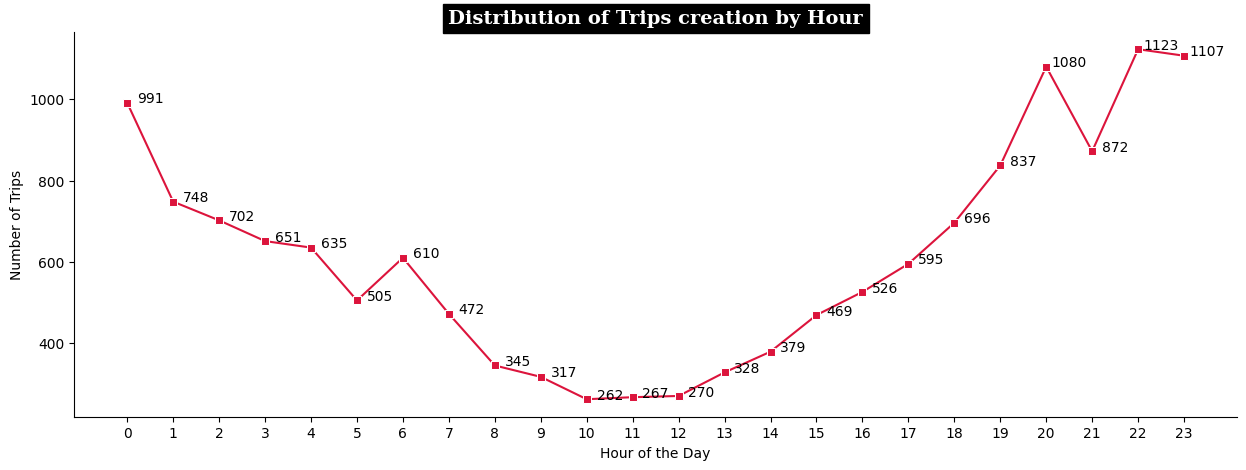

In [152]:
trip_creation_by_hour = trip_df.groupby(by='trip_creation_hour')['trip_uuid'].count().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=trip_creation_by_hour, x='trip_creation_hour', y='trip_uuid', marker='s', color='crimson')
plt.xticks(np.arange(0, 24))

for i, count in enumerate(trip_creation_by_hour['trip_uuid']):
    plt.text(trip_creation_by_hour['trip_creation_hour'][i]+0.5, count, count, ha='center')

plt.title('Distribution of Trips creation by Hour',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

In [153]:
cols=['trip_creation_year','trip_creation_month','trip_creation_week','trip_creation_weekday','trip_creation_day','trip_creation_day_week']
for col in cols:
    print(col+' Value Counts')
    print(trip_df[col].value_counts())
    print('-'*100)

trip_creation_year Value Counts
trip_creation_year
2018    14787
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
trip_creation_month Value Counts
trip_creation_month
9     13011
10     1776
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
trip_creation_week Value Counts
trip_creation_week
38    5001
39    4402
37    3608
40    1776
Name: count, dtype: Int64
----------------------------------------------------------------------------------------------------
trip_creation_weekday Value Counts
trip_creation_weekday
2    2731
5    2128
3    2103
4    2057
1    2035
0    1980
6    1753
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
trip_creation_day Value Counts
trip_creation_day
18    791
15    783
13    750
12    747
21    740
22    740
17    722
14    712

C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\3654449234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette=cp,width=0.3)
C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\3654449234.py:6: UserWarning: The palette list has more values (16) than needed (7), which may not be intended.
  sns.barplot(x=day_counts.index, y=day_counts.values, palette=cp,width=0.3)


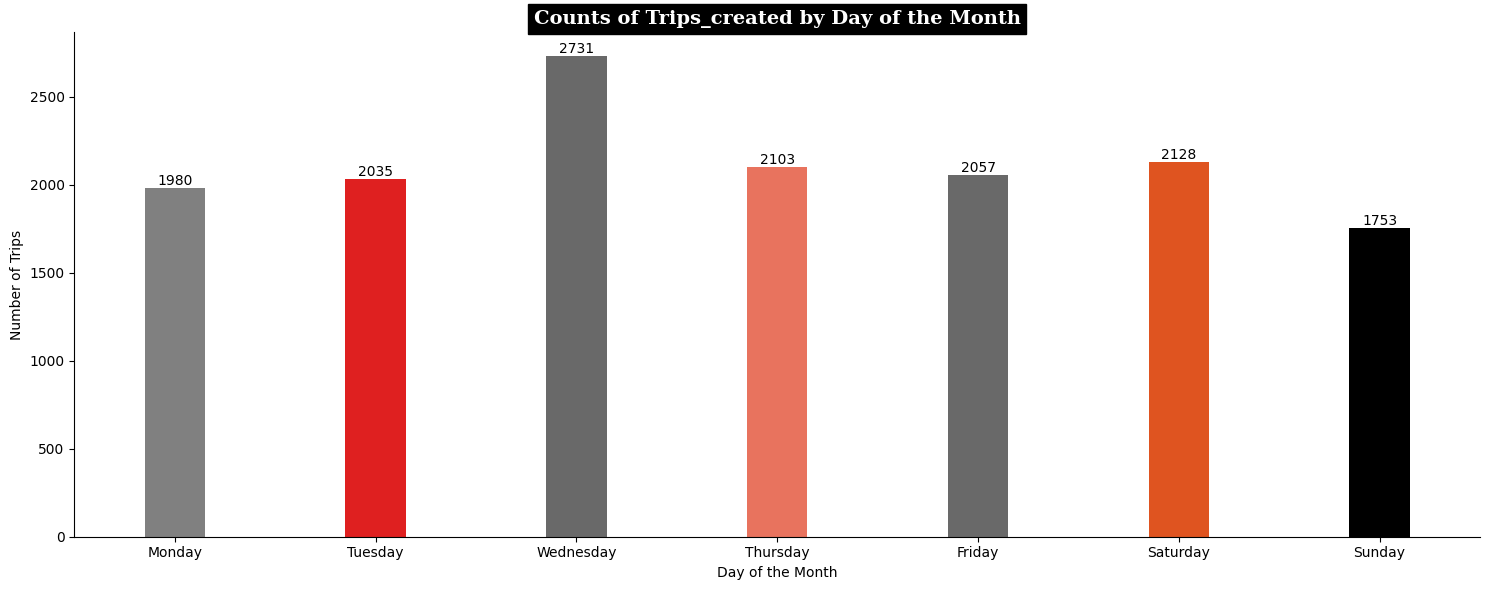

In [154]:
plt.figure(figsize=(15,6))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = trip_df['trip_creation_day_week'].value_counts().reindex(weekday_order)

sns.barplot(x=day_counts.index, y=day_counts.values, palette=cp,width=0.3)
for i, count in enumerate(day_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Counts of Trips_created by Day of the Month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.tight_layout()
sns.despine()
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_11124\3563794184.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =trip_df,x = trips_by_dateday['trip_creation_dayofdate'],y = trips_by_dateday['trip_uuid'], palette='Greys',width=0.3)


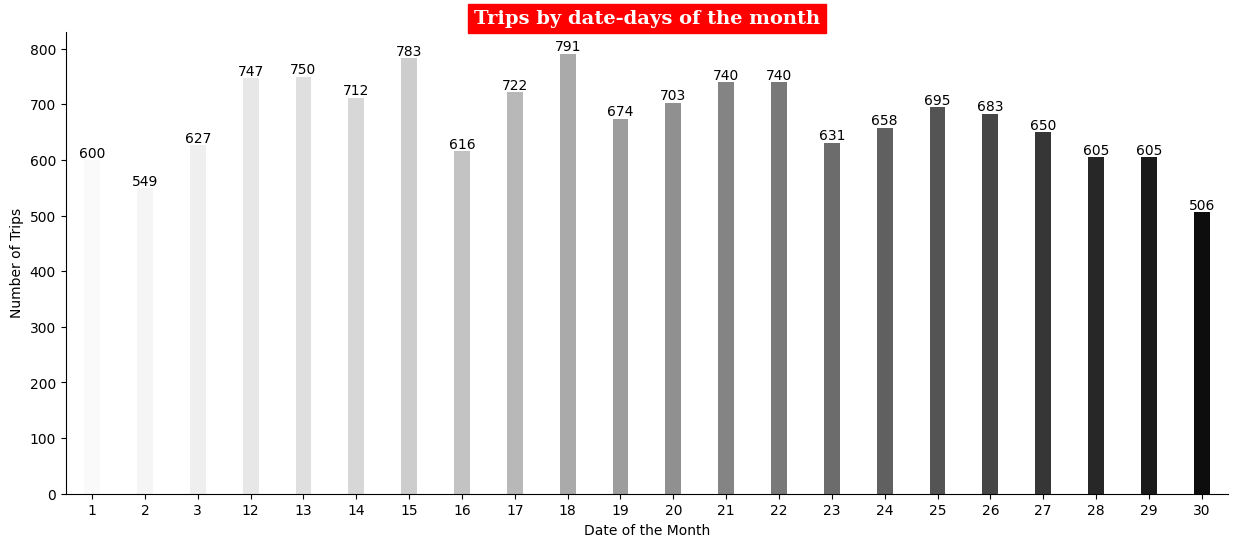

In [155]:
trip_df['trip_creation_dayofdate'] = trip_df['trip_creation_time'].dt.day
trips_by_dateday = trip_df.groupby(by = 'trip_creation_dayofdate')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (15, 6))
sns.barplot(data =trip_df,x = trips_by_dateday['trip_creation_dayofdate'],y = trips_by_dateday['trip_uuid'], palette='Greys',width=0.3)
for i, count in enumerate(trips_by_dateday['trip_uuid']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Trips by date-days of the month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.xlabel('Date of the Month')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

## **Outlier Treatment**

In [156]:
numerical_columns = trip_agg_df.select_dtypes(include=[np.float32, np.float64])
numerical_columns.head()

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,1548.0,1008.0,1320.4733
1,3.026865,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,141.0,65.0,84.1894
2,65.572709,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3308.0,1941.0,2545.2678
3,1.674916,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766
4,11.972484,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,340.0,115.0,146.7919


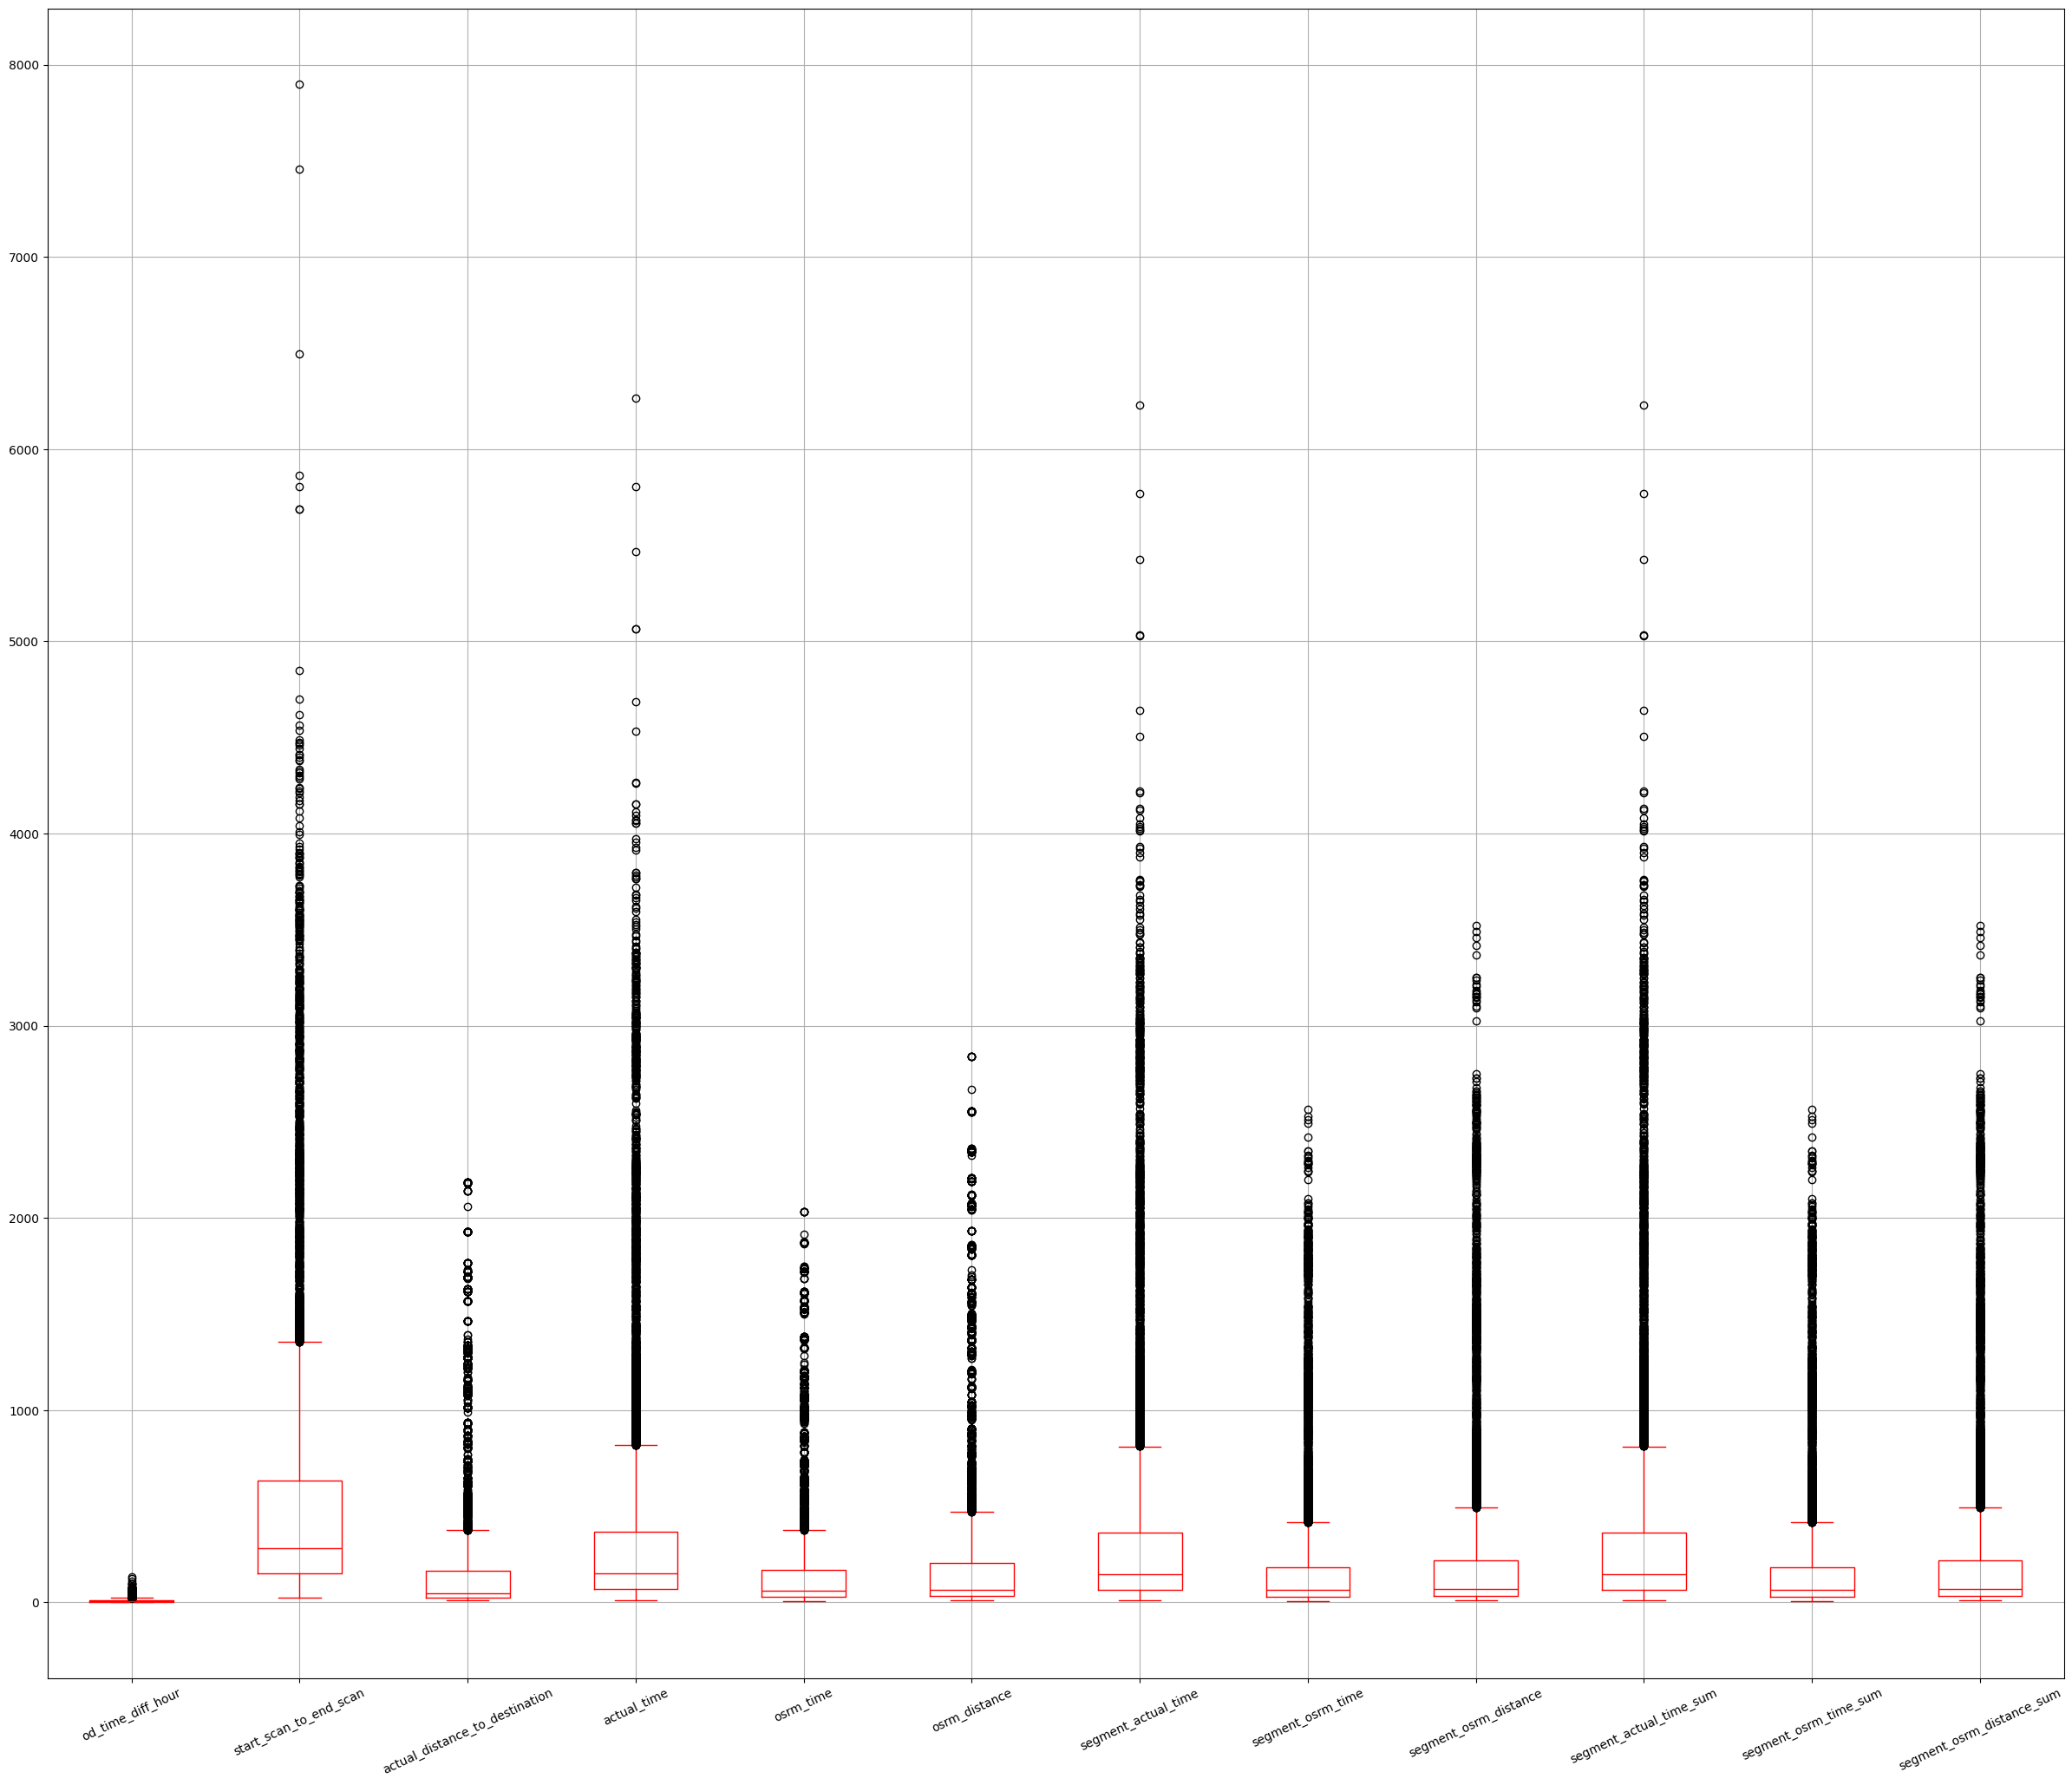

In [157]:
plt.figure(figsize=(30, 25))
numerical_columns.boxplot(rot=25, figsize=(35,20), color = 'r')
plt.grid('off')
plt.show()

In [158]:
# obtain the first quartile
Q1 = numerical_columns.quantile(0.25)

# obtain the third quartile
Q3 = numerical_columns.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

od_time_diff_hour                   8.063987
start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814159
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887300
segment_actual_time               298.000000
segment_osrm_time                 154.000000
segment_osrm_distance             183.981750
segment_actual_time_sum           298.000000
segment_osrm_time_sum             154.000000
segment_osrm_distance_sum         183.981750
dtype: float64


### **Boxplot for all the numerical columns**

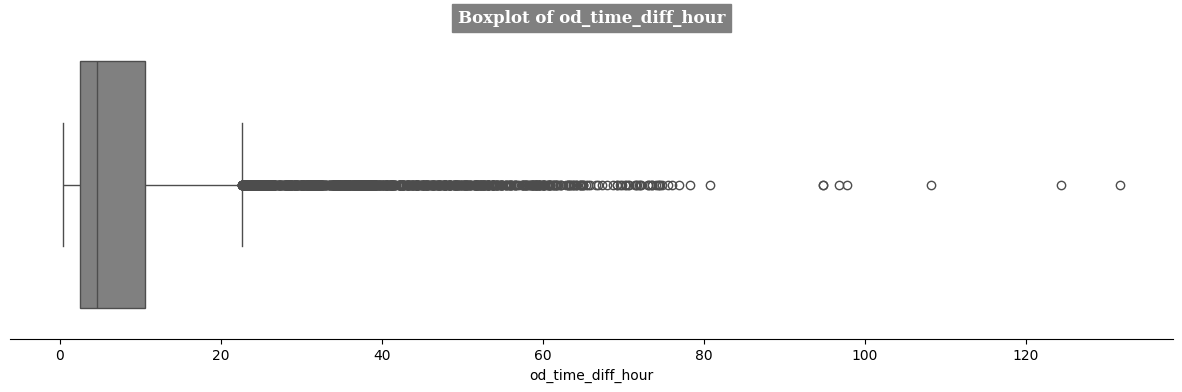

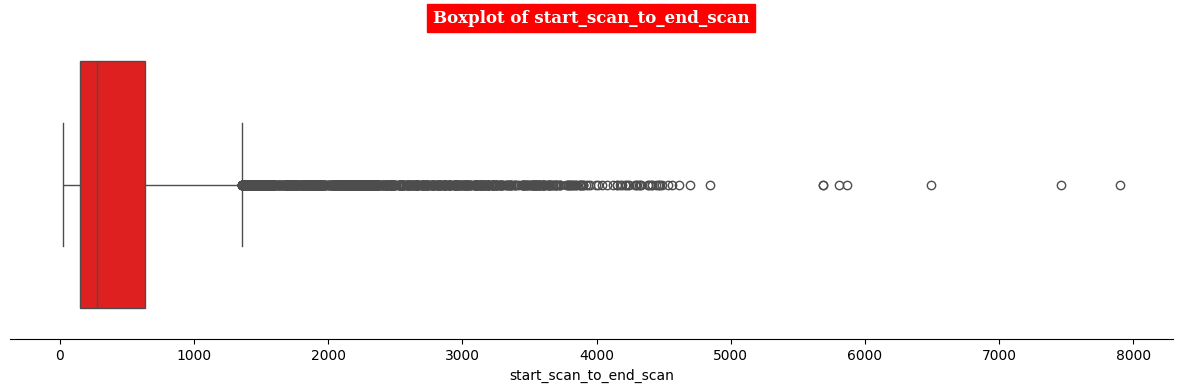

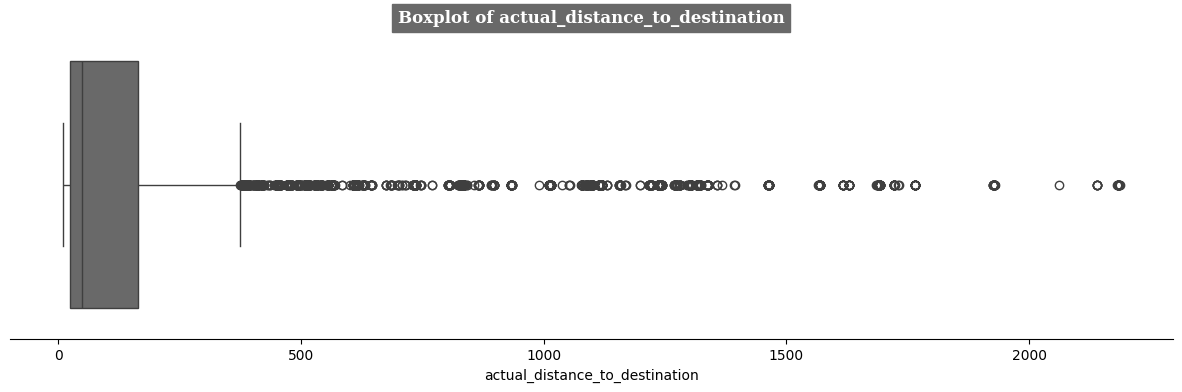

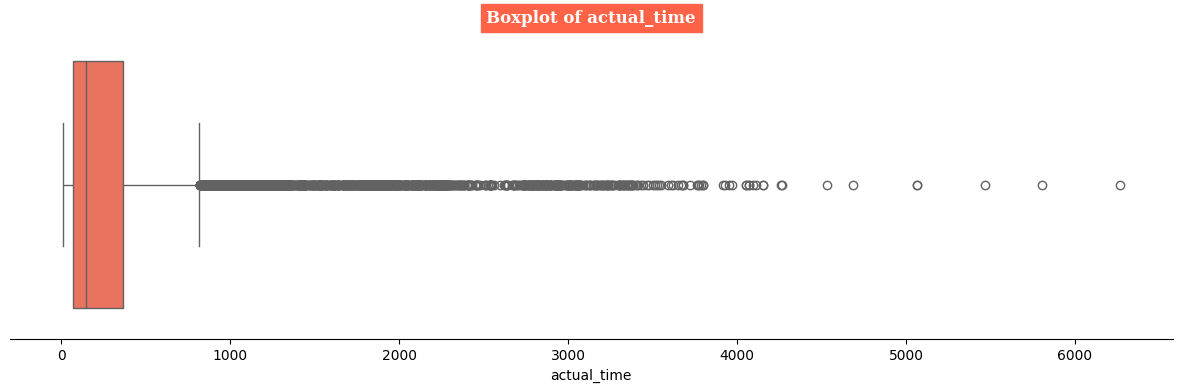

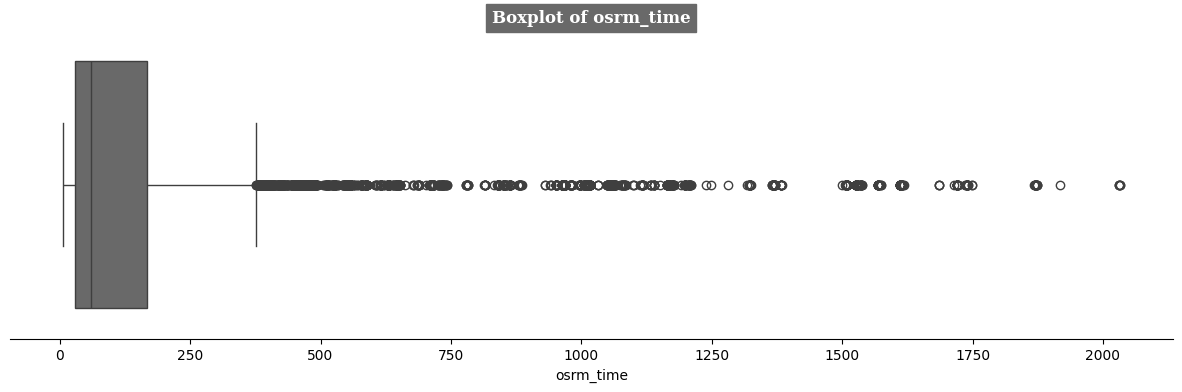

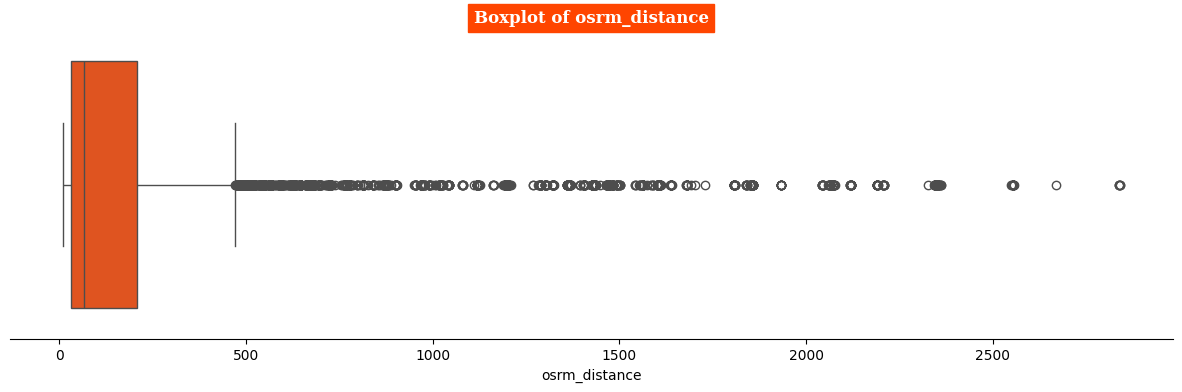

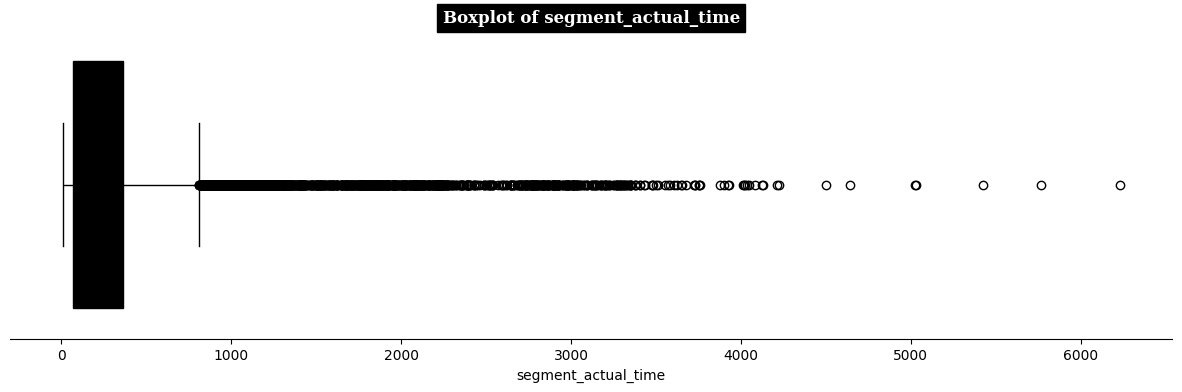

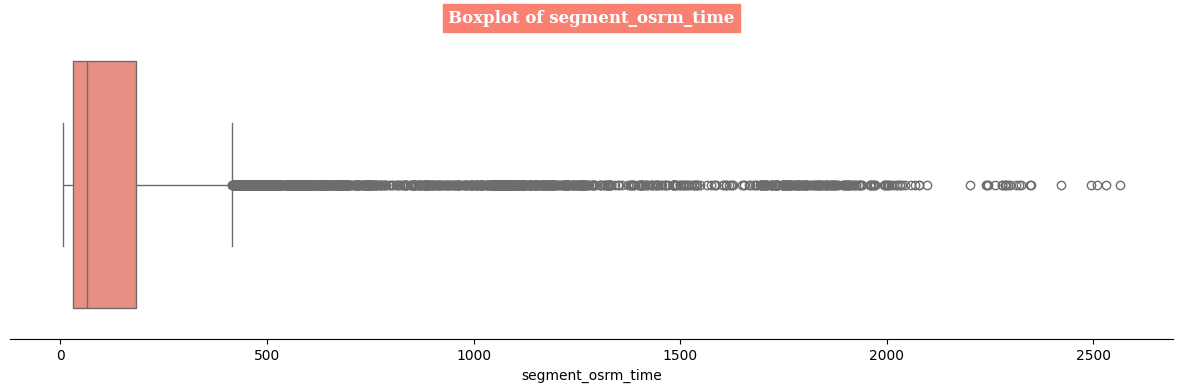

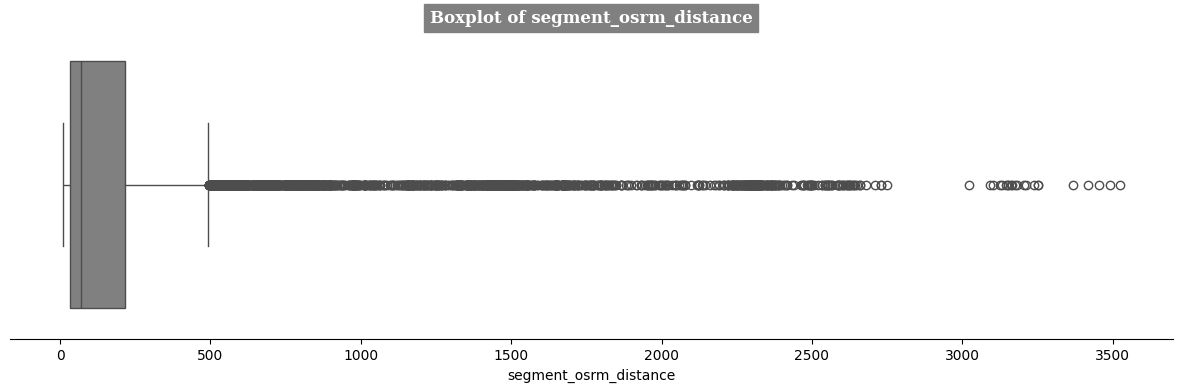

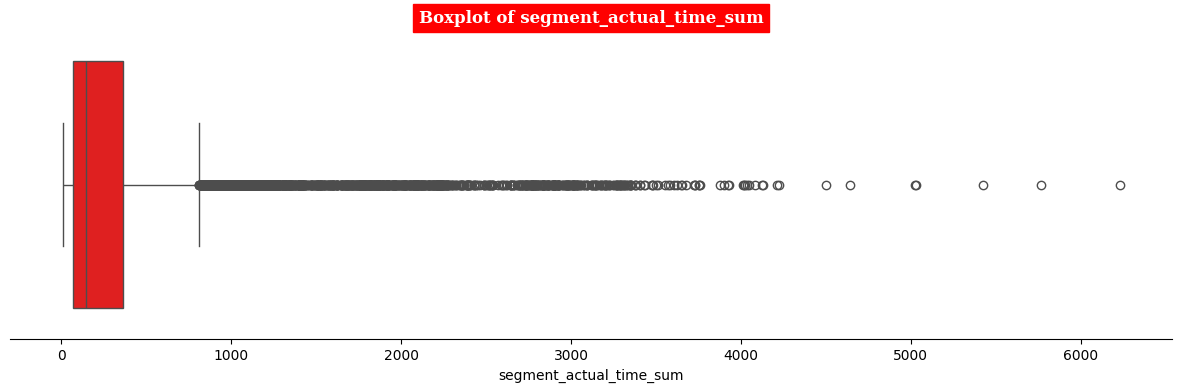

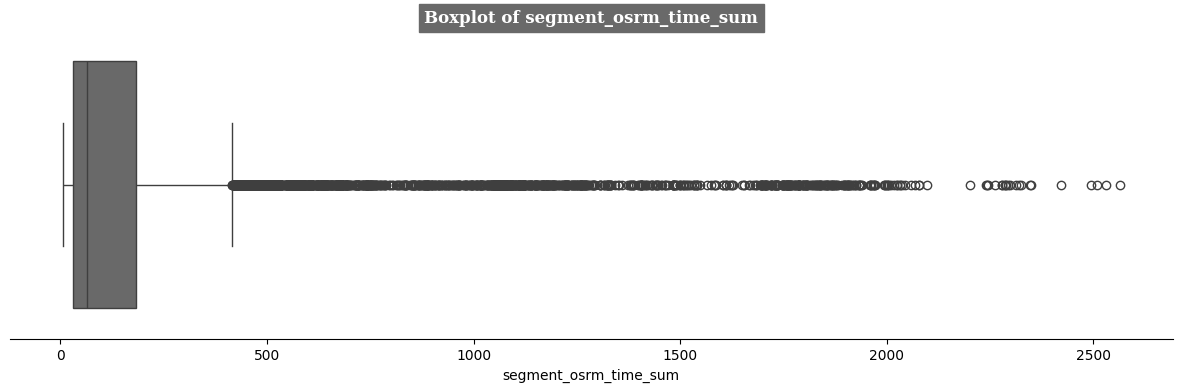

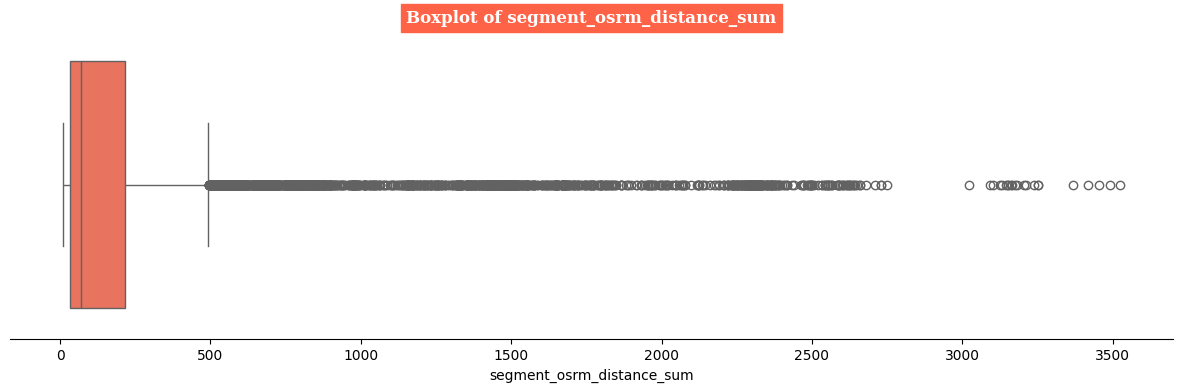

In [159]:
for i,col in enumerate(numerical_columns):
    plt.figure(figsize=(15,4))
    sns.boxplot(x=col, data=numerical_columns,color=cp[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of {col}',fontfamily='serif',fontweight='bold',fontsize=12,backgroundcolor=cp[i],color='w')
    plt.show()

### **Outlier Treatment by Clipping data**

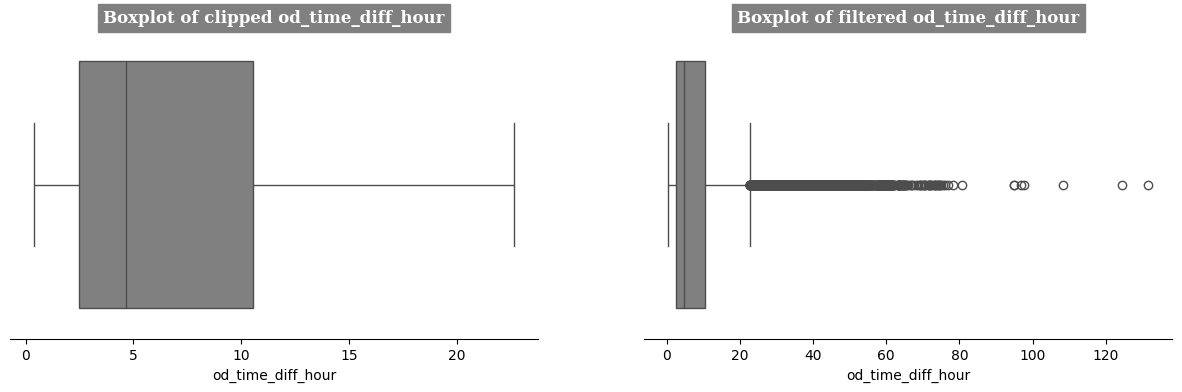

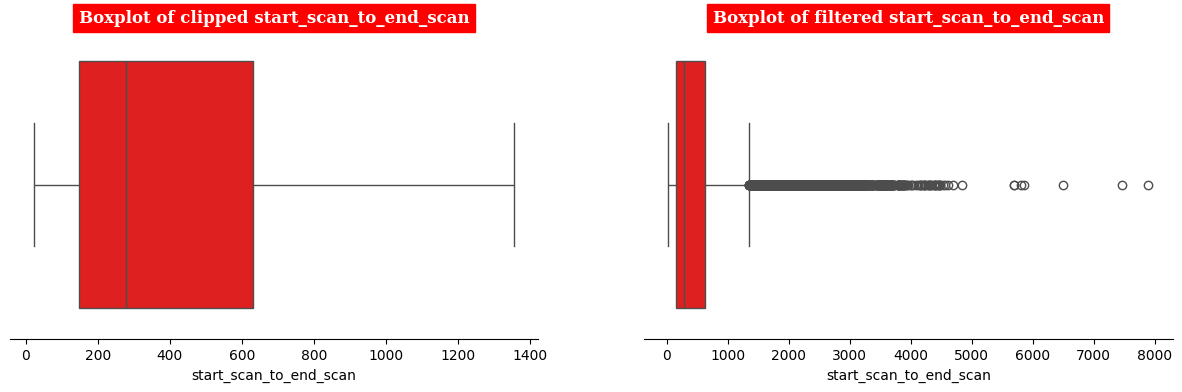

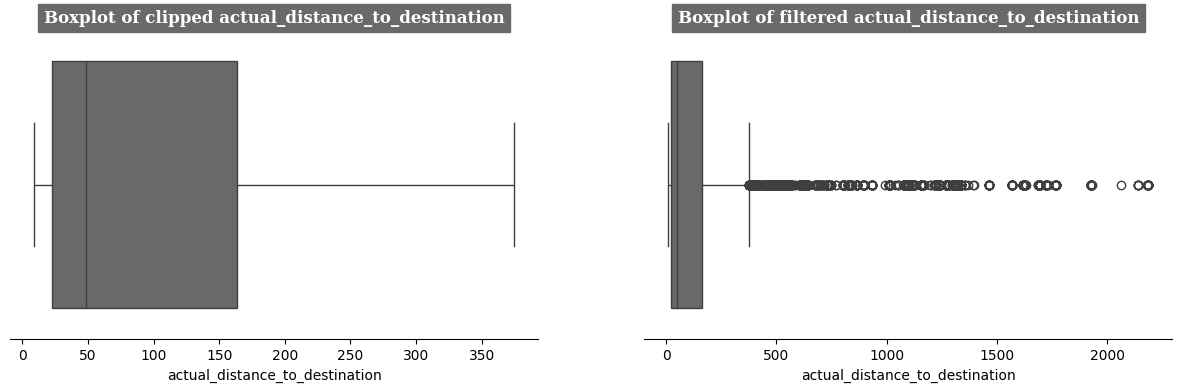

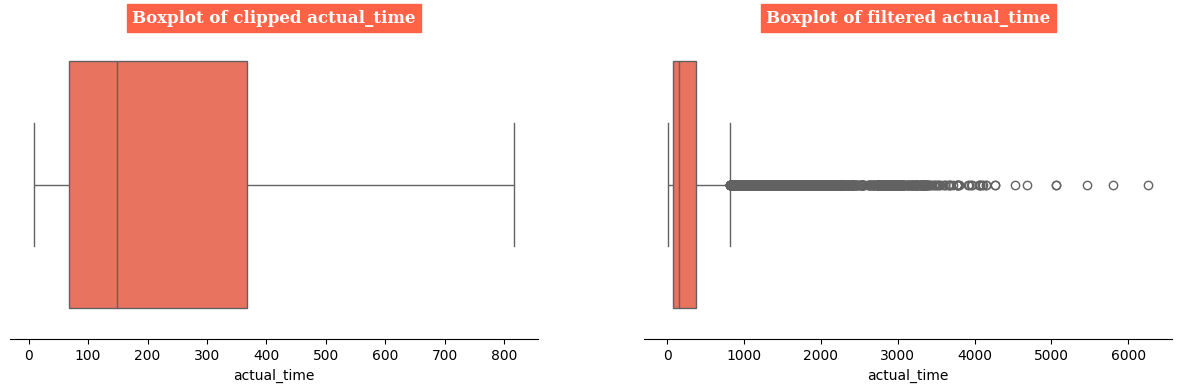

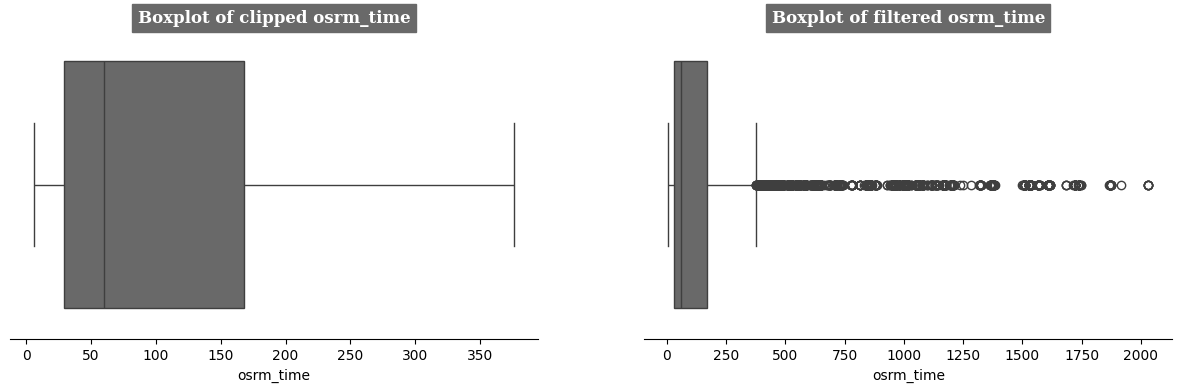

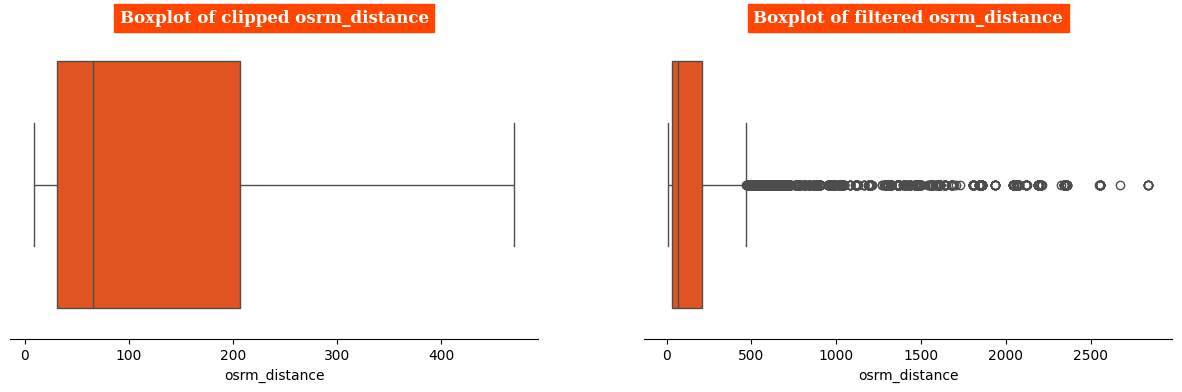

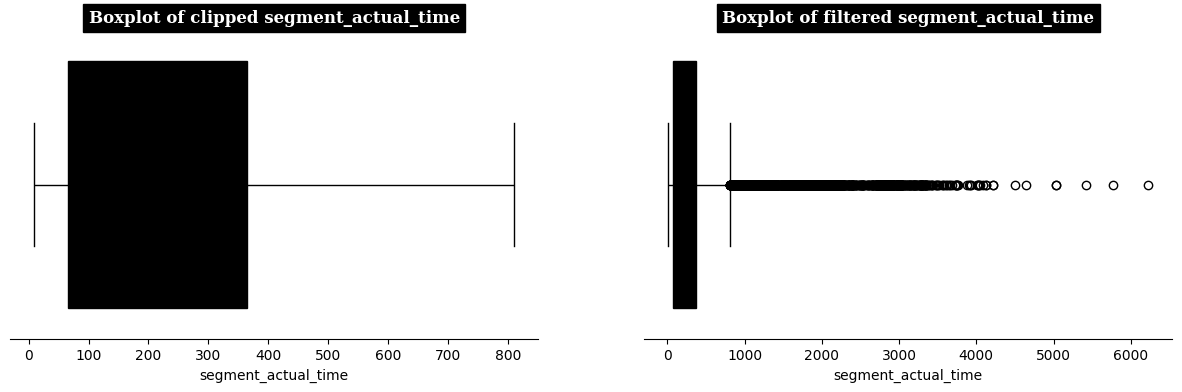

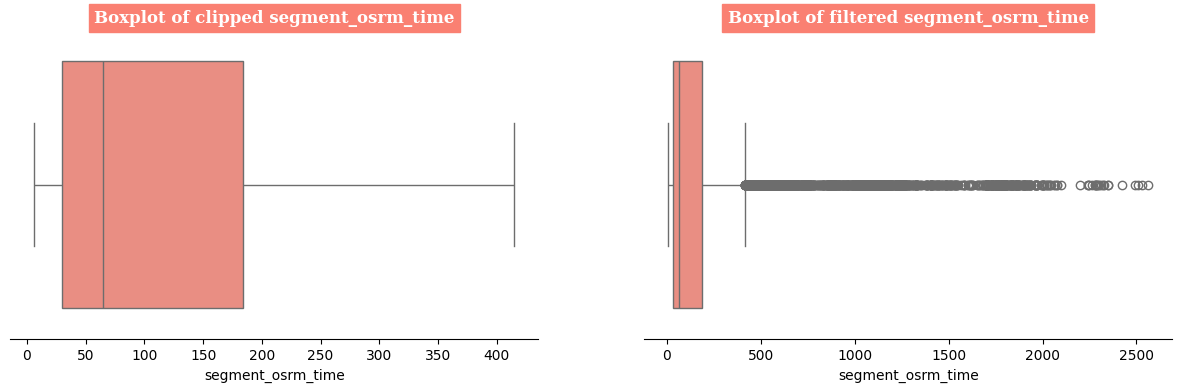

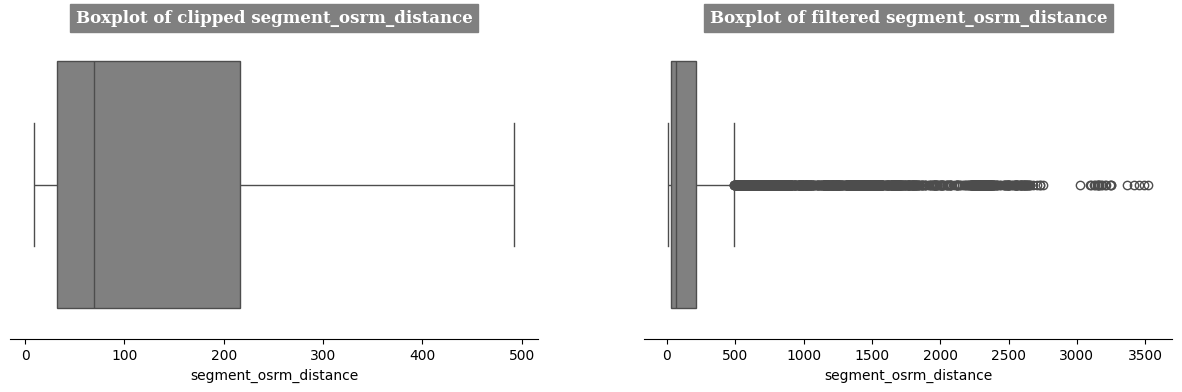

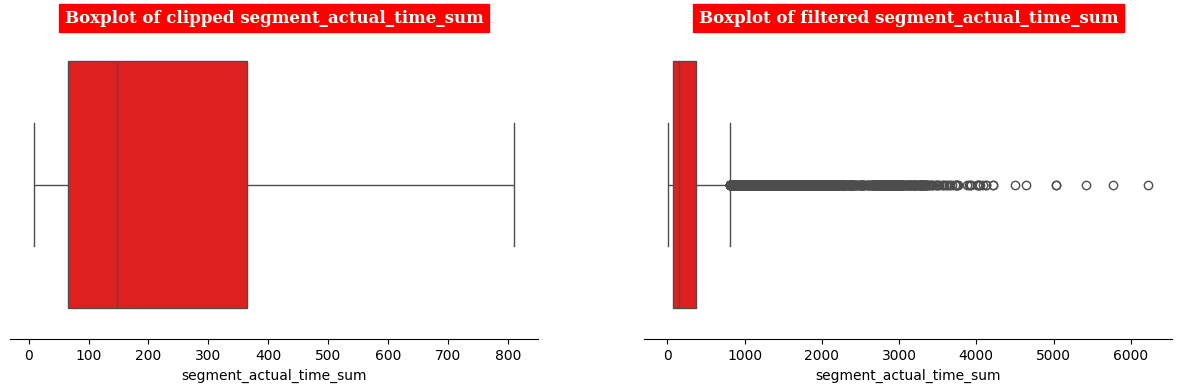

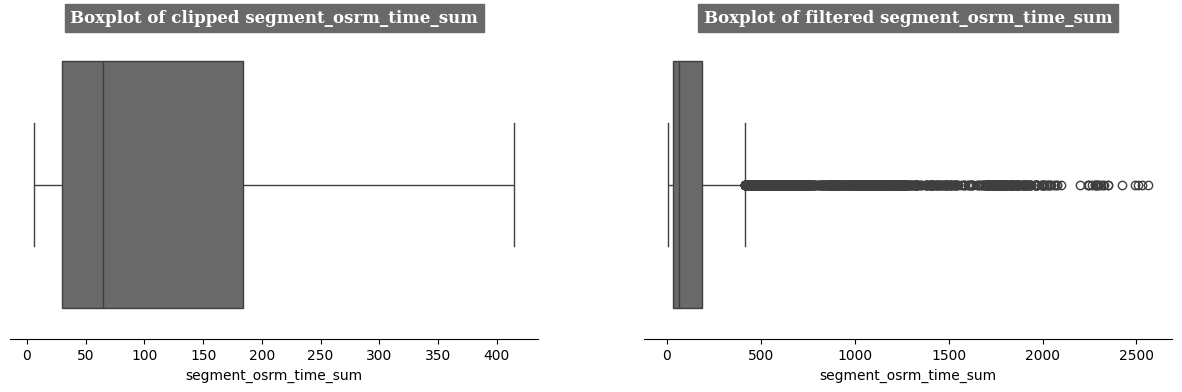

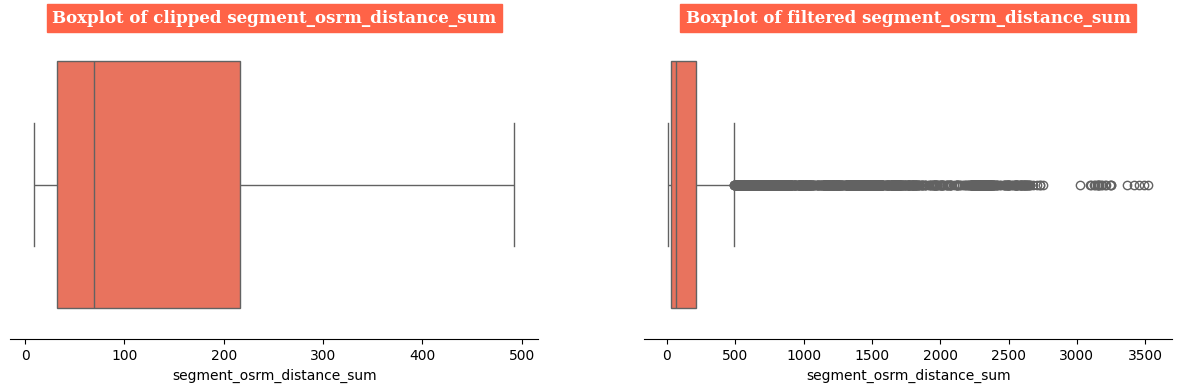

In [160]:
for i, col in enumerate(numerical_columns):
    
    data = trip_df[col]
    
    
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    clipped_data = np.clip(data, lower_bound, upper_bound)
    
    # Plot boxplot of the clipped data
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
    sns.boxplot(x=clipped_data, color=cp[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of clipped {col}', fontfamily='serif', fontweight='bold', fontsize=12, backgroundcolor=cp[i], color='w')
    
    filtered_data = data.loc[(data >= lower_bound) | (data <= upper_bound)]
    
    plt.subplot(122)
    sns.boxplot(x=filtered_data, color=cp[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of filtered {col}', fontfamily='serif', fontweight='bold', fontsize=12, backgroundcolor=cp[i], color='w')
      
    plt.show()

### **Insights**

- Here we see that the data after removing outliers has outliers.
- Clipped data replaces the outlier values with specified values.
- Here, I have proceeded with both clipped and filtered data(with reduced outliers) for further analysis.

## **Correlation**

In [161]:
num_cols_name = numerical_columns.columns.tolist()

In [162]:
Q1 = np.percentile(numerical_columns[num_cols_name], 25)
Q3 = np.percentile(numerical_columns[num_cols_name], 75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

clipped_numerical_columns = np.clip(numerical_columns[num_cols_name], lower_bound, upper_bound)

filtered_numerical_columns = numerical_columns[num_cols_name][(numerical_columns[num_cols_name] >= lower_bound) | (numerical_columns[num_cols_name] <= upper_bound)]
clipped_df_corr = clipped_numerical_columns.corr()
print('Clipped Data Correlation Matrix')
display(clipped_df_corr)

filtered_df_corr = filtered_numerical_columns.corr()
print('Filtered Data Correlation Matrix')
filtered_df_corr

Clipped Data Correlation Matrix


,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
od_time_diff_hour,1.000000,0.688210,0.848517,0.756201,0.853696,0.824259,0.757790,0.834750,0.812121,0.757790,0.834750,0.812121
start_scan_to_end_scan,0.688210,1.000000,0.707335,0.875006,0.714849,0.750788,0.873773,0.725459,0.757425,0.873773,0.725459,0.757425
actual_distance_to_destination,0.848517,0.707335,1.000000,0.844374,0.985623,0.985162,0.845297,0.974819,0.974736,0.845297,0.974819,0.974736
actual_time,0.756201,0.875006,0.844374,1.000000,0.851428,0.884737,0.999962,0.859223,0.888748,0.999962,0.859223,0.888748
osrm_time,0.853696,0.714849,0.985623,0.851428,1.000000,0.985720,0.852393,0.990601,0.975059,0.852393,0.990601,0.975059
osrm_distance,0.824259,0.750788,0.985162,0.884737,0.985720,1.000000,0.885397,0.982383,0.992409,0.885397,0.982383,0.992409
segment_actual_time,0.757790,0.873773,0.845297,0.999962,0.852393,0.885397,1.000000,0.859998,0.889228,1.000000,0.859998,0.889228
segment_osrm_time,0.834750,0.725459,0.974819,0.859223,0.990601,0.982383,0.859998,1.000000,0.984619,0.859998,1.000000,0.984619
segment_osrm_distance,0.812121,0.757425,0.974736,0.888748,0.975059,0.992409,0.889228,0.984619,1.000000,0.889228,0.984619,1.000000
segment_actual_time_sum,0.757790,0.873773,0.845297,0.999962,0.852393,0.885397,1.000000,0.859998,0.889228,1.000000,0.859998,0.889228


Filtered Data Correlation Matrix


,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
od_time_diff_hour,1.000000,0.999837,0.918644,0.961223,0.926973,0.924683,0.961288,0.918921,0.919665,0.961288,0.918921,0.919665
start_scan_to_end_scan,0.999837,1.000000,0.919159,0.961612,0.927471,0.925205,0.961634,0.919429,0.920191,0.961634,0.919429,0.920191
actual_distance_to_destination,0.918644,0.919159,1.000000,0.953920,0.993568,0.997268,0.952987,0.987542,0.993068,0.952987,0.987542,0.993068
actual_time,0.961223,0.961612,0.953920,1.000000,0.958781,0.959398,0.999989,0.954044,0.957151,0.999989,0.954044,0.957151
osrm_time,0.926973,0.927471,0.993568,0.958781,1.000000,0.997588,0.957955,0.993263,0.991624,0.957955,0.993263,0.991624
osrm_distance,0.924683,0.925205,0.997268,0.959398,0.997588,1.000000,0.958540,0.991802,0.994712,0.958540,0.991802,0.994712
segment_actual_time,0.961288,0.961634,0.952987,0.999989,0.957955,0.958540,1.000000,0.953214,0.956293,1.000000,0.953214,0.956293
segment_osrm_time,0.918921,0.919429,0.987542,0.954044,0.993263,0.991802,0.953214,1.000000,0.996098,0.953214,1.000000,0.996098
segment_osrm_distance,0.919665,0.920191,0.993068,0.957151,0.991624,0.994712,0.956293,0.996098,1.000000,0.956293,0.996098,1.000000
segment_actual_time_sum,0.961288,0.961634,0.952987,0.999989,0.957955,0.958540,1.000000,0.953214,0.956293,1.000000,0.953214,0.956293


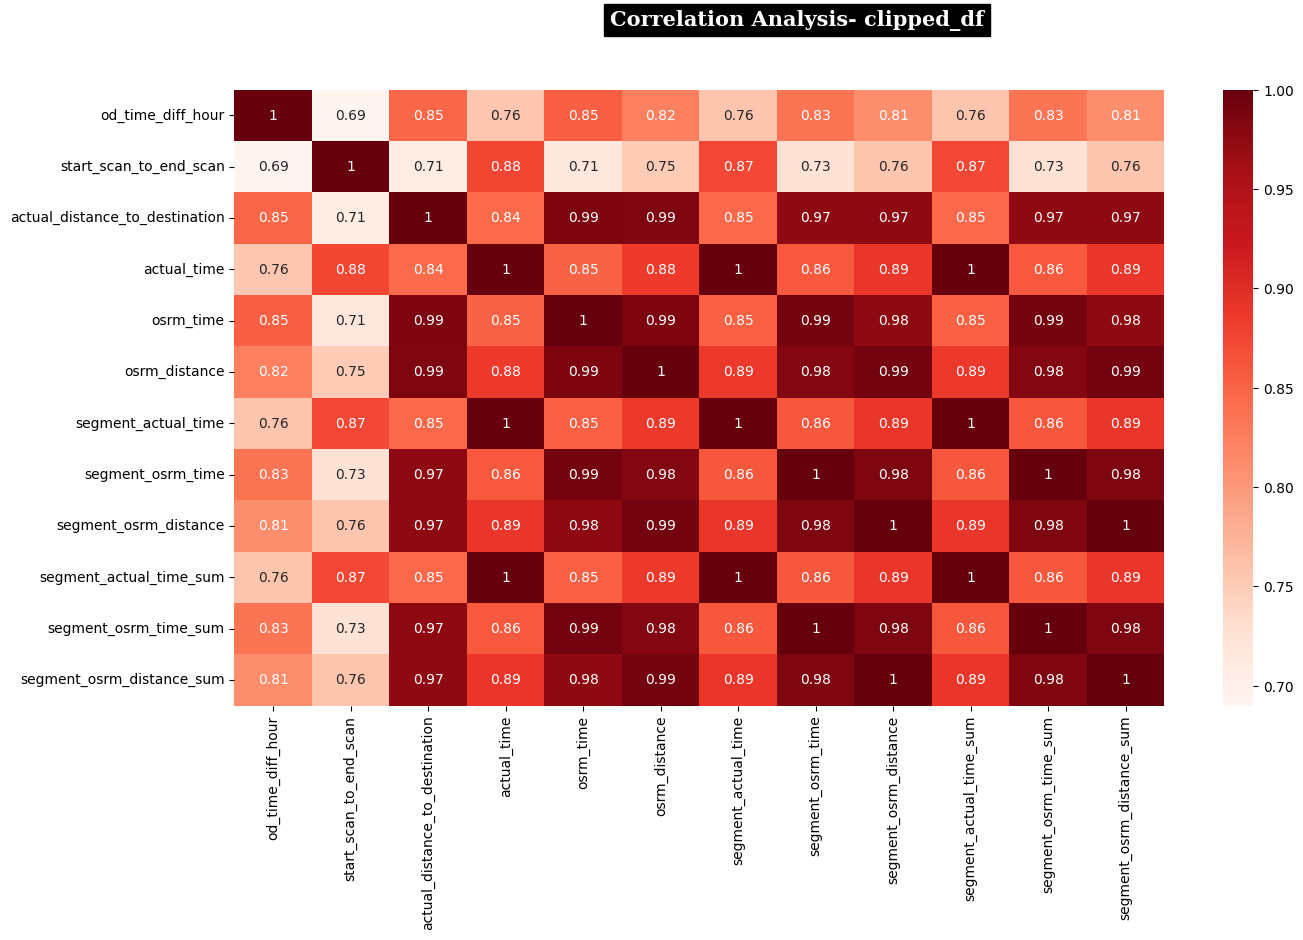

In [163]:
plt.figure(figsize = (15,8))
plt.suptitle(f'Correlation Analysis- clipped_df',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='k',color='w')
sns.heatmap(data = clipped_df_corr,vmin=0.69, annot = True, cmap='Reds')
plt.show()

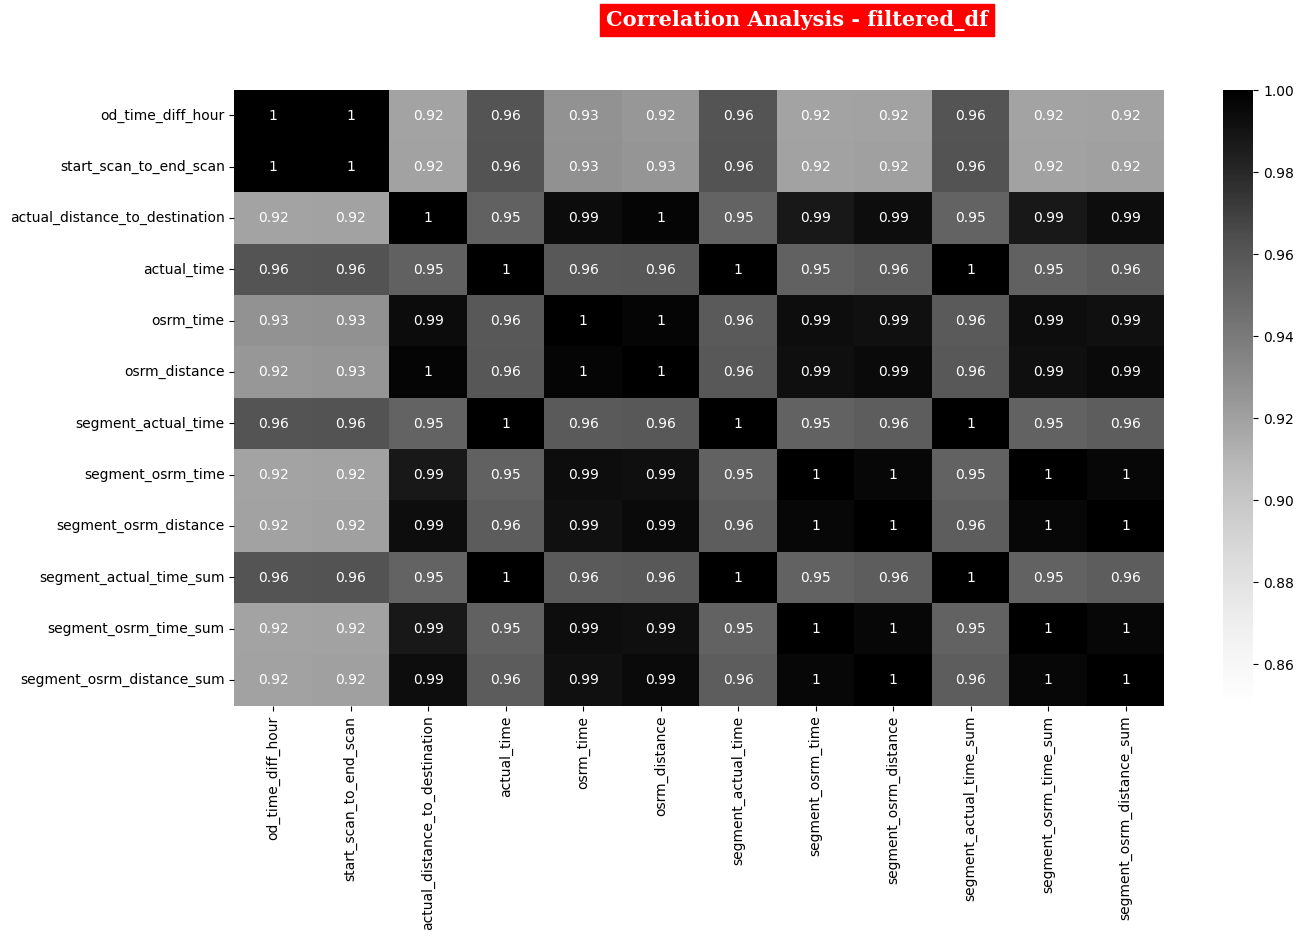

In [164]:
plt.figure(figsize = (15,8))
plt.suptitle(f'Correlation Analysis - filtered_df',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='r',color='w')
sns.heatmap(data = filtered_df_corr,vmin=0.85, annot = True, cmap='Greys')
plt.show()

### **Insights:**
- High correlation between all the variables

### **Skewness of the data**

In [165]:
trip_df.skew(numeric_only = True)

od_time_diff_hour                  2.89355
trip_creation_month               2.337439
trip_creation_year                     0.0
trip_creation_day                -0.695241
trip_creation_hour               -0.206092
trip_creation_weekday             0.065904
trip_creation_week                0.181308
start_scan_to_end_scan            2.895337
actual_distance_to_destination    3.562931
actual_time                       3.375178
osrm_time                         3.455256
osrm_distance                     3.553619
segment_actual_time               3.372042
segment_osrm_time                 3.602915
segment_osrm_distance             3.714017
segment_actual_time_sum           3.372042
segment_osrm_time_sum             3.602915
segment_osrm_distance_sum         3.714017
trip_creation_dayofdate          -0.695241
dtype: Float64

### **Insights:**
- We can see most of the data is positively skewed which shows that the data is `Right Skewed`

## **One Hot Encoding**

In [166]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  object        
 2   route_type                      14787 non-null  object        
 3   od_start_time                   14787 non-null  datetime64[ns]
 4   od_end_time                     14787 non-null  datetime64[ns]
 5   od_time_diff_hour               14787 non-null  float64       
 6   trip_creation_time              14787 non-null  datetime64[ns]
 7   trip_creation_month             14787 non-null  int32         
 8   trip_creation_year              14787 non-null  int32         
 9   trip_creation_day               14787 non-null  int32         
 10  trip_creation_hour              14787 non-null  int32         
 11  tr

In [167]:
categorical_cols = ['data','route_type']

In [168]:
# one hot encoding the categorical features
# import statsmodels.api as sm
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
encoded_cat_cols = ohe.fit_transform(trip_df[categorical_cols])

categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(categorical_cols))
display(categorical_encoded_df)

encoded_df = pd.concat([trip_df,categorical_encoded_df],axis=1)
encoded_df

,data_test,data_training,route_type_Carting,route_type_FTL
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
14782,1.0,0.0,1.0,0.0
14783,1.0,0.0,1.0,0.0
14784,1.0,0.0,1.0,0.0
14785,1.0,0.0,1.0,0.0


,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,...,source_place,destination_name,destination_city,destination_state,destination_place,trip_creation_dayofdate,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.668497,2018-09-12 00:00:16.535741,9,2018,12,...,Central_H_6,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur_HB,12,0.0,1.0,0.0,1.0
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,9,2018,12,...,ChikaDPP_D,Chikblapur_ShntiSgr_D (Karnataka),Chikblapur,Karnataka,ShntiSgr_D,12,0.0,1.0,1.0,0.0
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,65.572709,2018-09-12 00:00:33.691250,9,2018,12,...,Bilaspur_HB,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur_H,12,0.0,1.0,0.0,1.0
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,9,2018,12,...,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd_IP,12,0.0,1.0,1.0,0.0
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.972484,2018-09-12 00:02:09.740725,9,2018,12,...,Dc,Hospet (Karnataka),Hospet,Karnataka,Hospet,12,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,4.300482,2018-10-03 23:55:56.258533,10,2018,3,...,Mehmdpur_H,Zirakpur_DC (Punjab),Zirakpur,Punjab,DC,3,1.0,0.0,1.0,0.0
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,1.009842,2018-10-03 23:57:23.863155,10,2018,3,...,Balabhgarh_DPC,Faridabad_Blbgarh_DC (Haryana),Faridabad,Haryana,Blbgarh_DC,3,1.0,0.0,1.0,0.0
14784,trip-153861106442901555,test,Carting,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,7.035331,2018-10-03 23:57:44.429324,10,2018,3,...,GovndNgr_DC,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central_H_6,3,1.0,0.0,1.0,0.0
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,5.808548,2018-10-03 23:59:14.390954,10,2018,3,...,VdkkuSrt_I,Eral_Busstand_D (Tamil Nadu),Eral,Tamil Nadu,Busstand_D,3,1.0,0.0,1.0,0.0


## **Min-Max Scaler**

In [169]:
# Normalizing/Standardizing the numerical features using MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_numerical = min_max_scaler.fit_transform(trip_df[num_cols_name])

# Converting the scaled features back to a dataframe
min_max_scaled_df = pd.DataFrame(min_max_scaled_numerical, columns=num_cols_name)
min_max_scaled_df

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,0.284016,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134,0.247388,0.391712,0.373134
1,0.020082,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373,0.021218,0.023065,0.021373
2,0.496617,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625,0.530301,0.756450,0.721625
3,0.009782,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074,0.008037,0.003909,0.003074
4,0.088239,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185,0.053207,0.042611,0.039185
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,0.029786,0.029714,0.022392,0.011829,0.027641,0.022745,0.011734,0.021892,0.015872,0.011734,0.021892,0.015872
14783,0.004715,0.004698,0.002990,0.001918,0.002962,0.002478,0.001929,0.001955,0.001996,0.001929,0.001955,0.001996
14784,0.050623,0.050540,0.013631,0.043638,0.020731,0.017602,0.043723,0.032056,0.027262,0.043723,0.032056,0.027262
14785,0.041276,0.041143,0.057736,0.040761,0.085390,0.057237,0.040026,0.084050,0.061020,0.040026,0.084050,0.061020


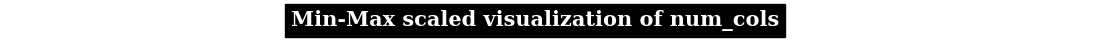

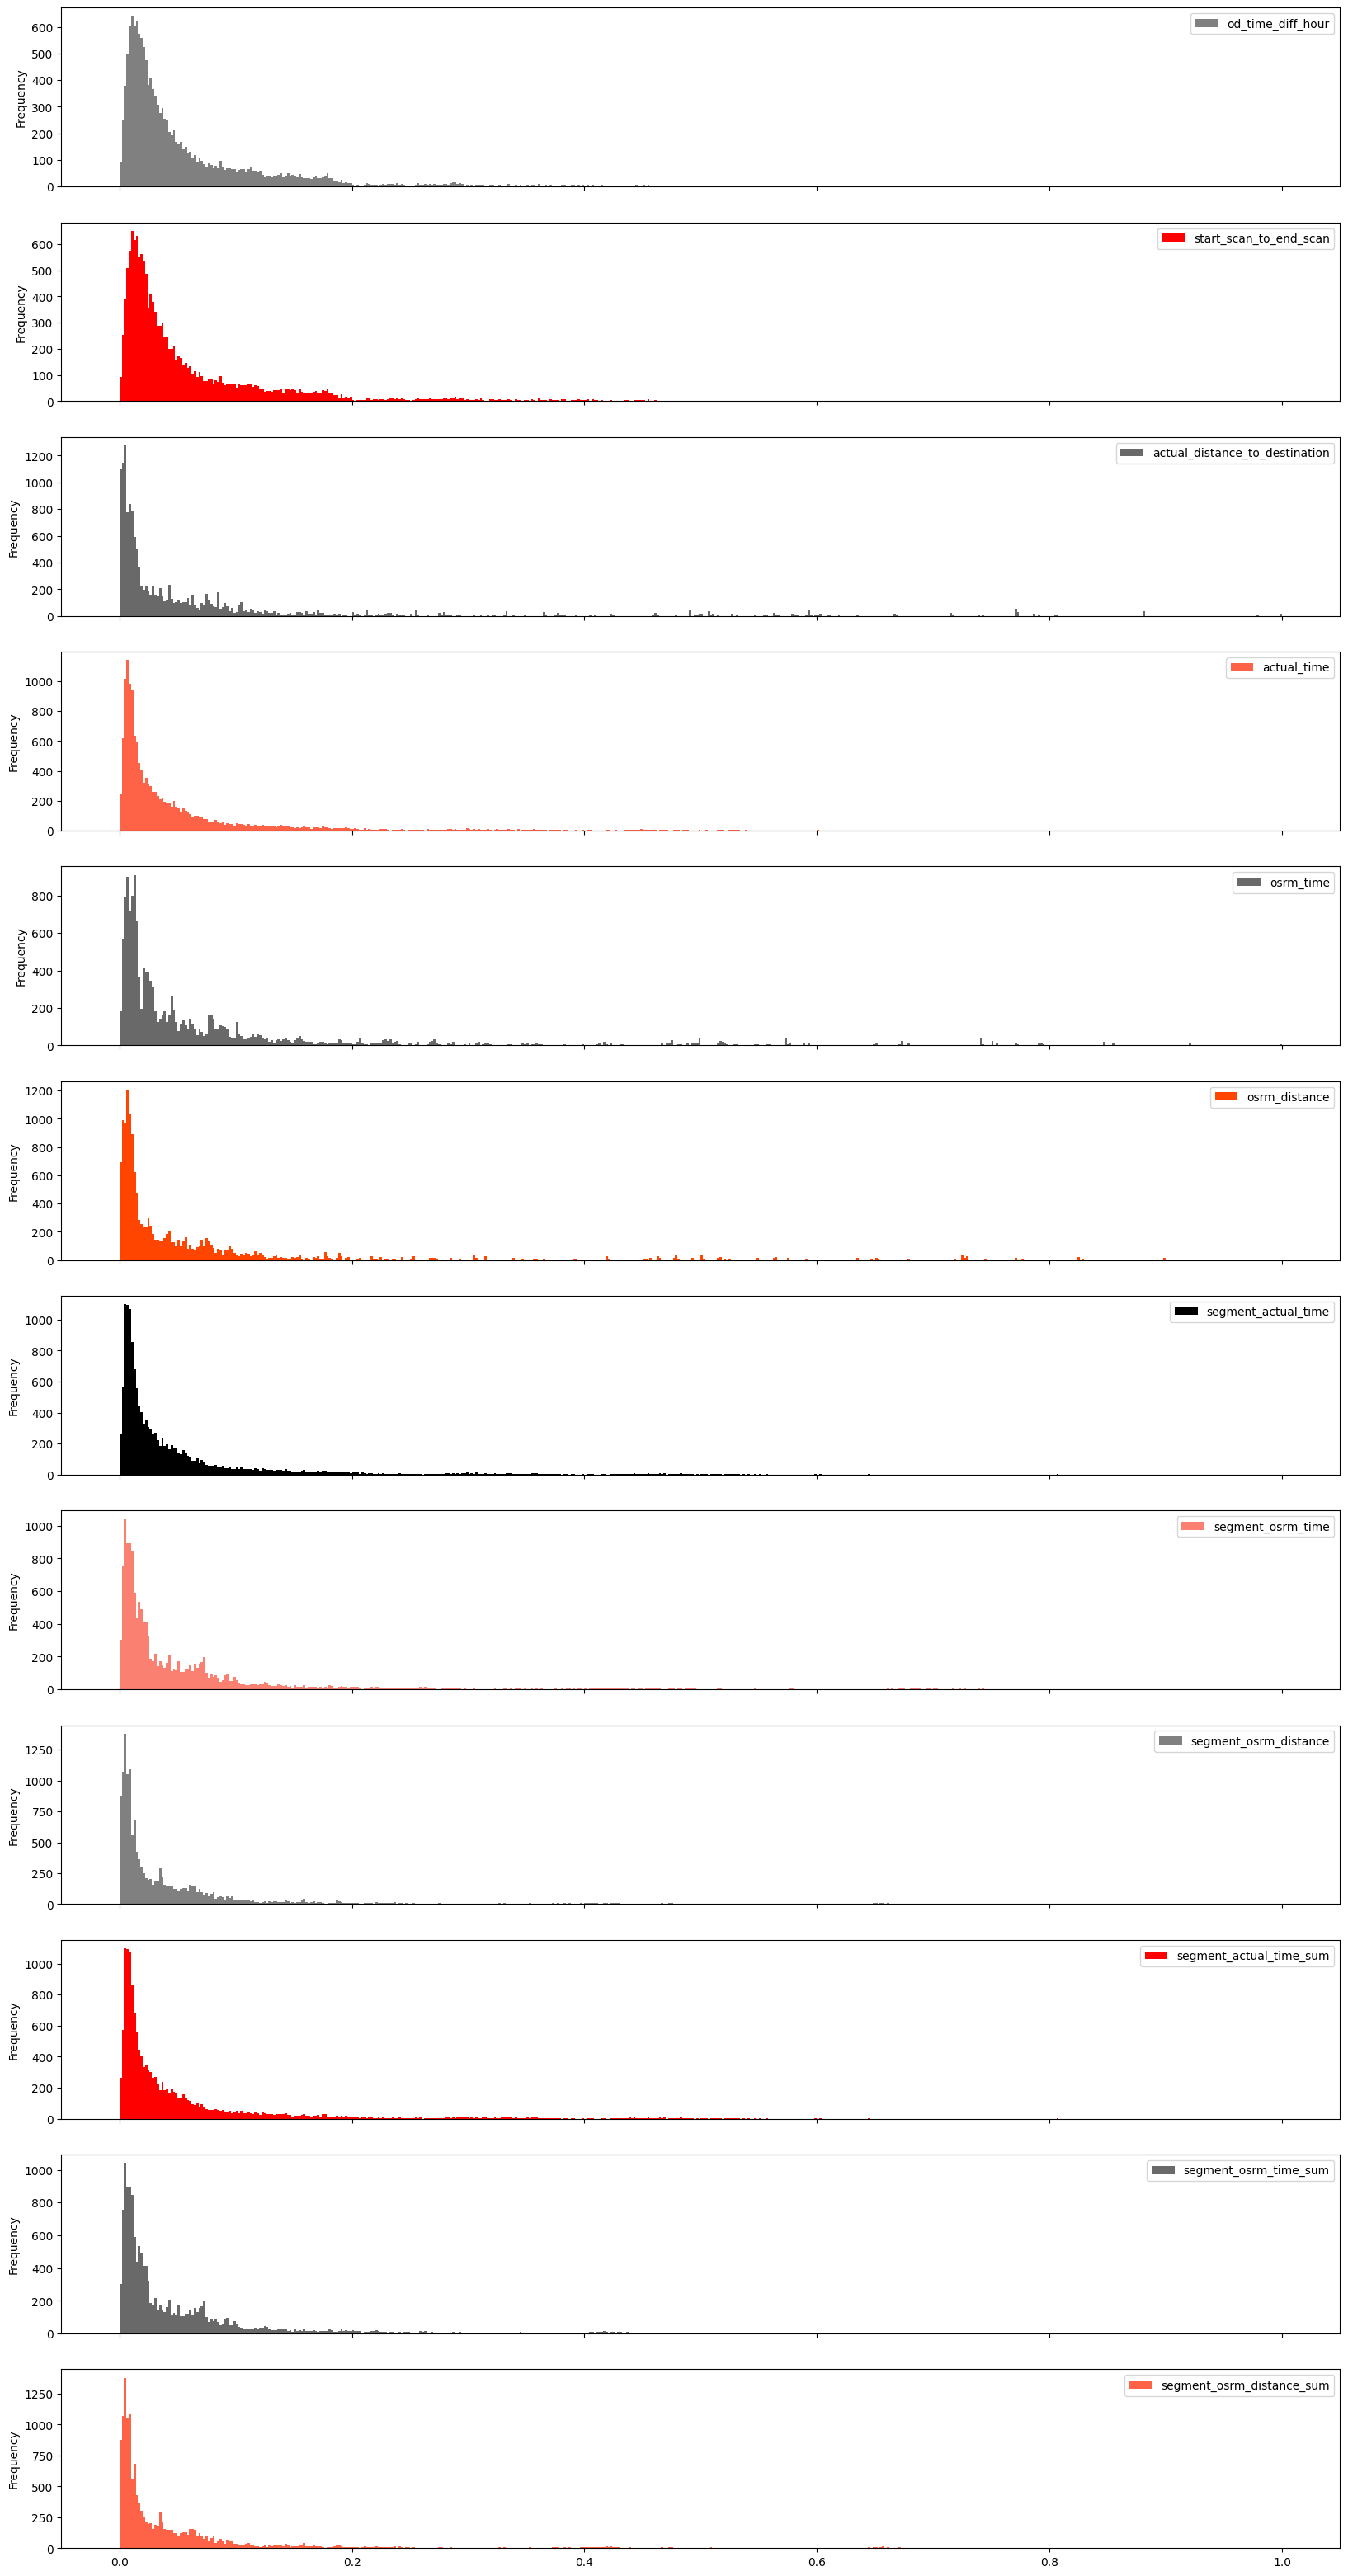

In [170]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.suptitle(f'Min-Max scaled visualization of num_cols',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='k',color='w')
min_max_scaled_df.plot(kind='hist', figsize=(20,40),subplots=True,color=cp,bins=500)
plt.show()

- Performing Standardization as all the graphs are right skewed not gaussian distribution.

In [171]:
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(trip_df[num_cols_name])

# Converting the scaled features back to a dataframe
std_scaled_df = pd.DataFrame(std_scaled, columns=num_cols_name)
std_scaled_df

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,2.625886,2.627598,2.162548,2.147277,2.048290,2.125107,2.147833,2.629714,2.633597,2.147833,2.629714,2.633597
1,-0.529518,-0.530859,-0.297563,-0.379887,-0.342571,-0.320538,-0.381163,-0.367090,-0.332307,-0.381163,-0.367090,-0.332307
2,5.167598,5.170772,5.772034,5.326268,5.816936,5.802622,5.311326,5.594737,5.571936,5.311326,5.594737,5.571936
3,-0.652664,-0.652397,-0.480911,-0.529486,-0.537818,-0.497115,-0.528553,-0.522809,-0.486596,-0.528553,-0.522809,-0.486596
4,0.285312,0.284962,-0.119943,-0.027259,-0.162059,-0.154082,-0.023473,-0.208192,-0.182120,-0.023473,-0.208192,-0.182120
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,-0.413508,-0.413880,-0.348054,-0.486744,-0.364674,-0.351972,-0.487212,-0.376623,-0.378690,-0.487212,-0.376623,-0.378690
14783,-0.713243,-0.713166,-0.486350,-0.597162,-0.548870,-0.506808,-0.596856,-0.538699,-0.495684,-0.596856,-0.538699,-0.495684
14784,-0.164399,-0.164728,-0.410502,-0.132335,-0.416249,-0.391263,-0.129522,-0.293997,-0.282653,-0.129522,-0.293997,-0.282653
14785,-0.276143,-0.277150,-0.096128,-0.164392,0.066344,-0.088455,-0.170863,0.128670,0.001984,-0.170863,0.128670,0.001984


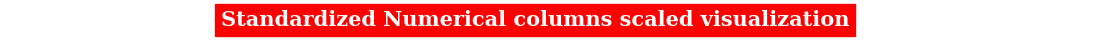

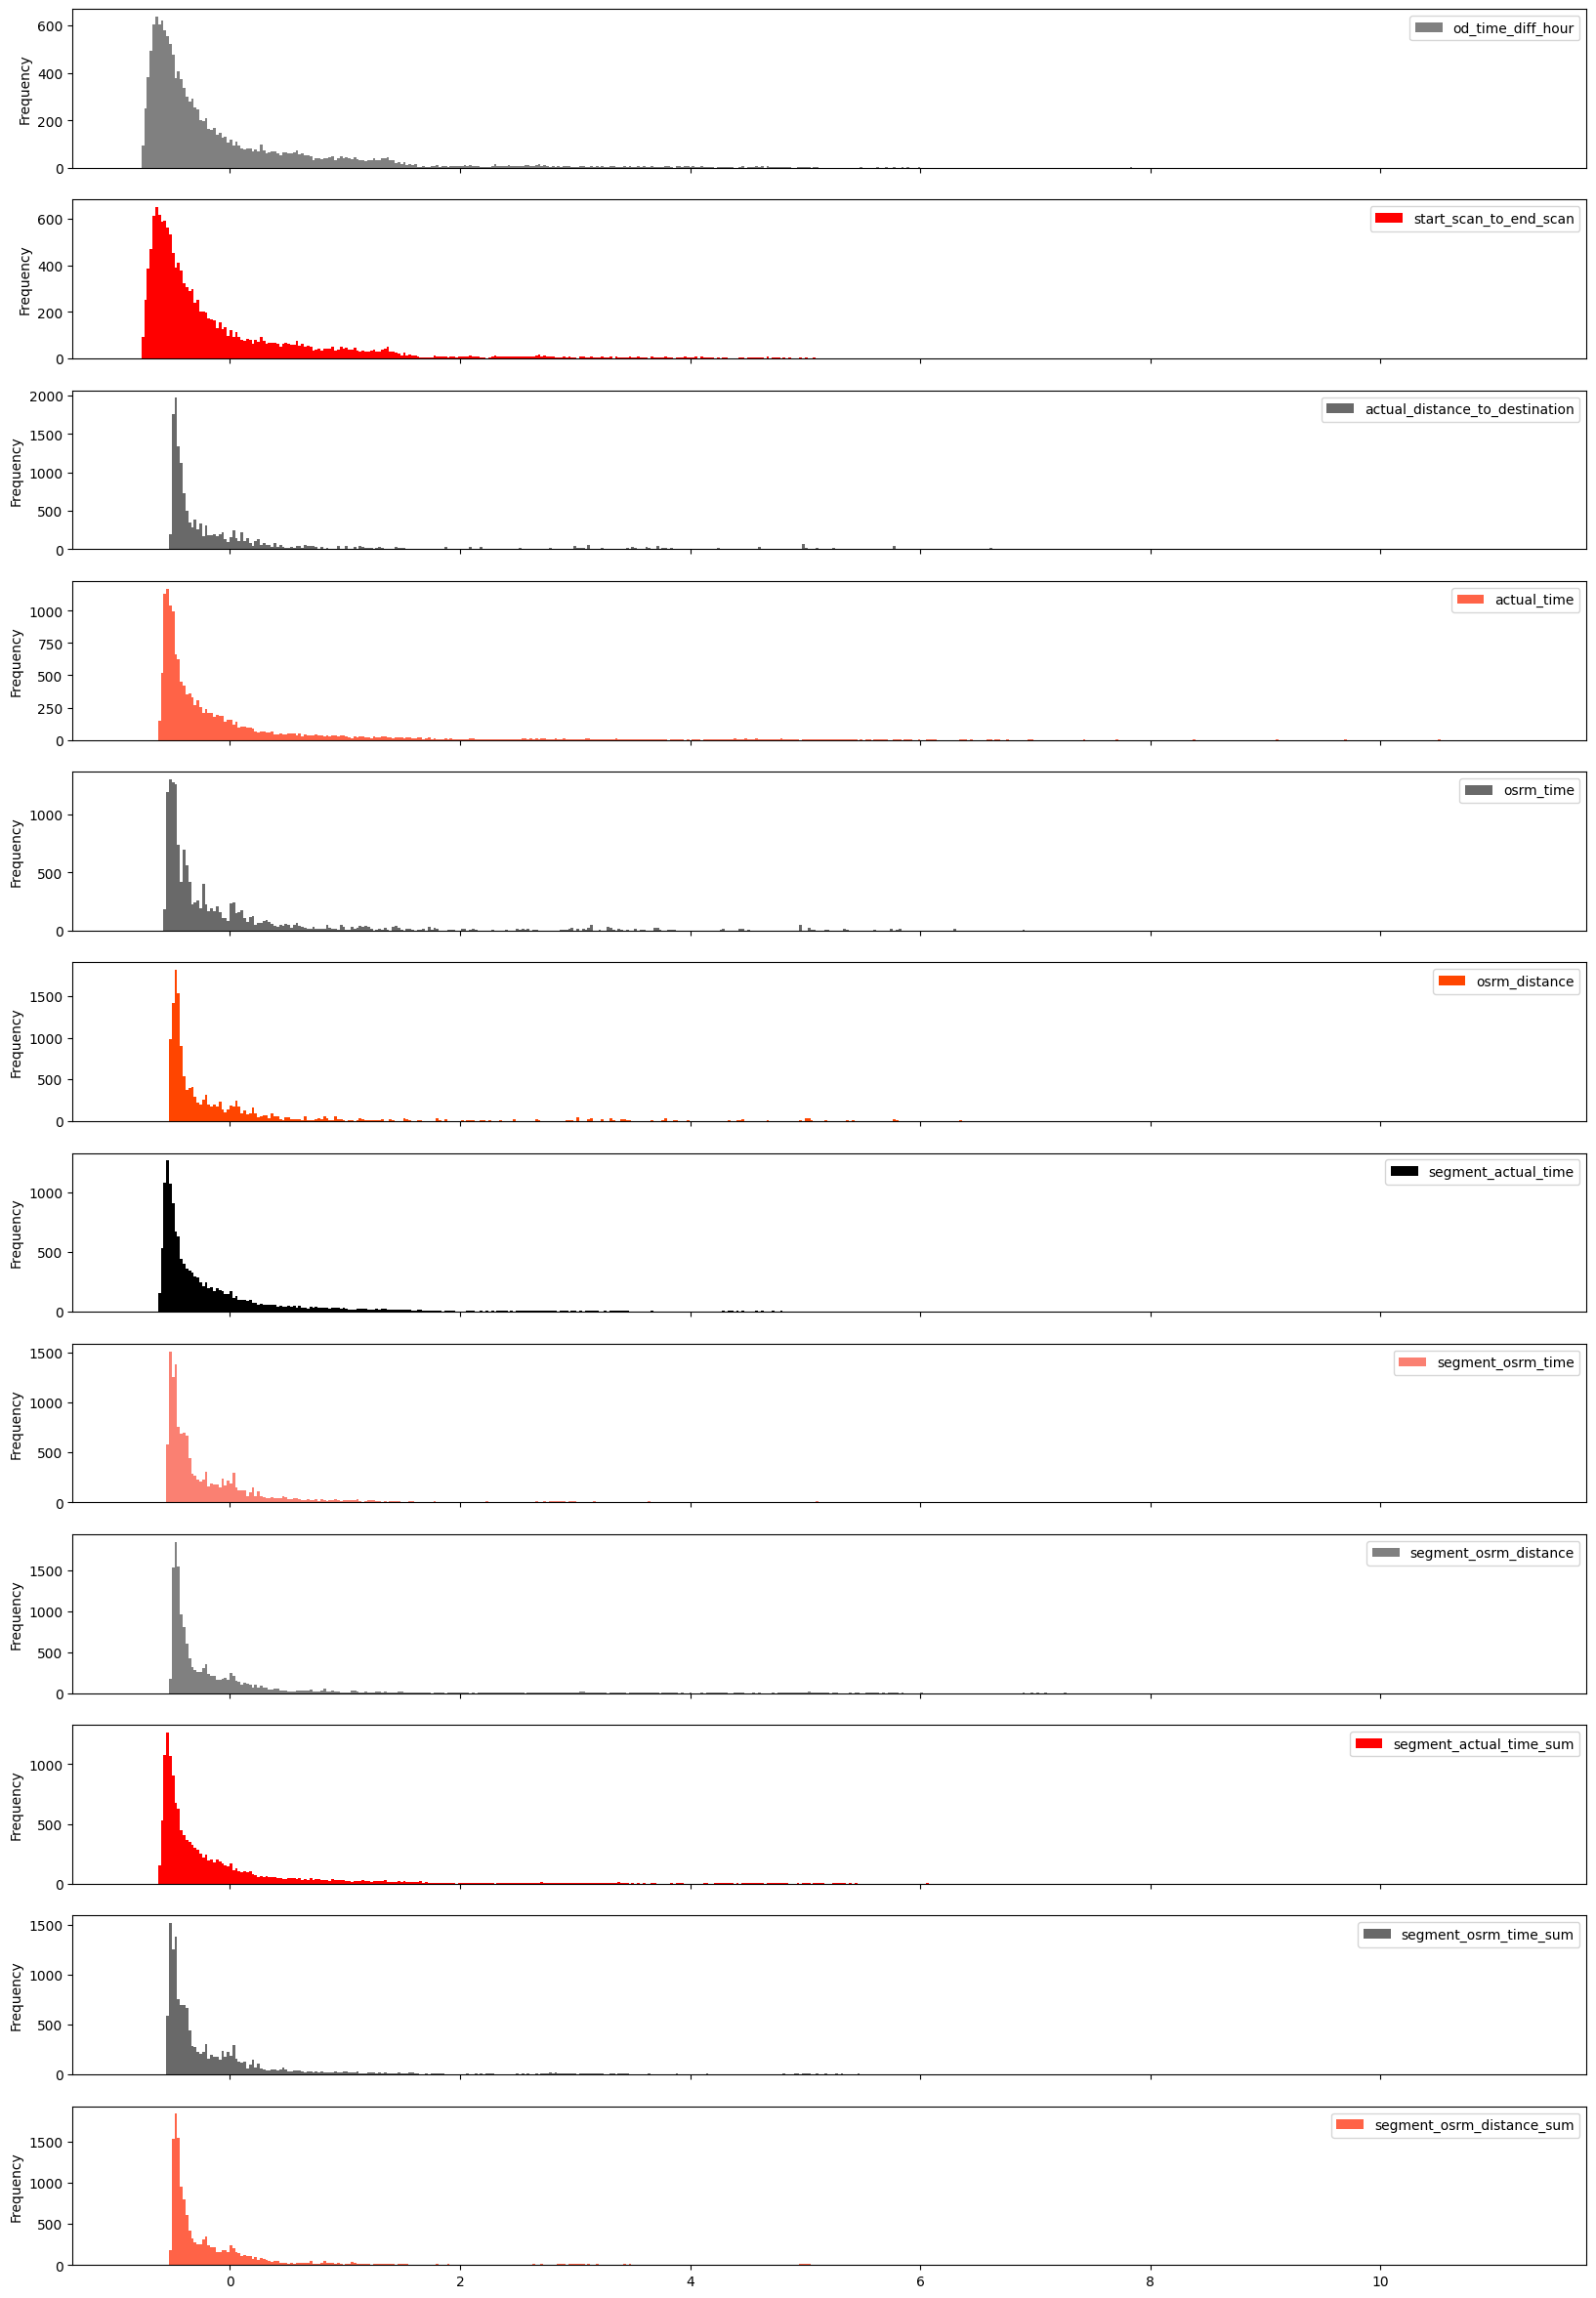

In [172]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.suptitle(f'Standardized Numerical columns scaled visualization',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='r',color='w')
std_scaled_df.plot(kind='hist', figsize=(20,30),subplots=True,color=cp,bins=500)
plt.show()

## **Hypothesis Testing**
## **Actual time Aggregated value and OSRM time aggregated value.**

In [173]:
clipped_numerical_columns.sample()

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
14350,2.769485,166.0,15.445478,77.0,17.0,17.4968,77.0,17.0,17.1443,77.0,17.0,17.1443


In [174]:
actual_time = clipped_numerical_columns['actual_time']
osrm_time = clipped_numerical_columns['osrm_time']
fil_actual_time = filtered_numerical_columns['actual_time']
fil_osrm_time = filtered_numerical_columns['osrm_time']

##### **Normality Check**

In [175]:
col_names= ['clipped_actual_time','clipped_osrm_time','filtered_actual_time','filtered_osrm_time']
cols = [actual_time,osrm_time,fil_actual_time,fil_osrm_time]

#checking normality by shapiro
from scipy.stats import shapiro
for i in range(len(cols)):
    stat, p = shapiro(cols[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p < alpha:
        print('Sample does not look Gaussian (reject H0)')
    else:
        print('Sample looks Gaussian (fail to reject H0)')

Statistics=0.832, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.724, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.580, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.546, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\mohit\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14787.
  res = hypotest_fun_out(*samples, **kwds)


##### **Equal Variance Test**

In [176]:
from scipy.stats import levene

# Assuming 'cols' is a list of column data (each element is a vector/array of values)
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        # Perform Levene's test on two columns at a time
        stat, p = levene(cols[i], cols[j])
        print(f'Levene Test between columns {i} and {j}: Statistics={stat:.3f}, p={p:.3f}')
        
        # Interpret the p-value
        alpha = 0.05
        if p < alpha:
            print('Samples do not have equal variance (reject H0)')
        else:
            print('Samples have equal variance (fail to reject H0)')


Levene Test between columns 0 and 1: Statistics=1254.027, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 0 and 2: Statistics=873.879, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 0 and 3: Statistics=82.576, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 1 and 2: Statistics=1740.673, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 1 and 3: Statistics=187.965, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 2 and 3: Statistics=1013.846, p=0.000
Samples do not have equal variance (reject H0)


The samples are not gaussian and don't have equal variances as well

So performing non parametric test

In [177]:
## with clipped data

# H0 : aggregated actual time is same as aggregated osrm time
# Ha : aggregated actual time is more than the aggregated osrm time
from scipy.stats import wilcoxon
alpha = 0.05  #testing at 95% confidence

test_stat , p_value = wilcoxon(actual_time,osrm_time,alternative='greater')

if p_value < alpha:
    print("Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time")
else:
    print("Fail to Reject Null Hypothesis - The Aggregated Actual_time is same as the Aggregated OSRM_time")

Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time


In [178]:
## with filtered data

# H0 : filtered actual time is same as filtered osrm time
# Ha : filtered actual time is more than the filtered osrm time
from scipy.stats import wilcoxon
alpha = 0.05  #testing at 95% confidence

test_stat , p_value = wilcoxon(fil_actual_time,fil_osrm_time,alternative='greater')

if p_value < alpha:
    print("Reject Null Hypothesis - The filtered Actual_time is More than the filtered OSRM_time")
else:
    print("Fail to Reject Null Hypothesis - The filtered Actual_time is same as the filtered OSRM_time")

Reject Null Hypothesis - The filtered Actual_time is More than the filtered OSRM_time


### **Insights:**
- It is found that The Aggregated Actual_time is More than the Aggregated OSRM_time through Wilcoxon signed Rank test.
- it is found that The Filtered Actual_time is More than the Filtered OSRM_time through Wilcoxon signed Rank test.

## **Actual_time aggregated value and Segment actual time aggregated value.**

In [179]:
segment_actual_time = clipped_numerical_columns['segment_actual_time']
fil_segment_actual_time = filtered_numerical_columns['segment_actual_time']

##### **Normality Check**

In [180]:
cols = [actual_time,segment_actual_time,fil_actual_time,fil_segment_actual_time]

#checking normality by shapiro
from scipy.stats import shapiro
for i in range(len(cols)):
    stat, p = shapiro(cols[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p < alpha:
        print('Sample does not look Gaussian (reject H0)')
    else:
        print('Sample looks Gaussian (fail to reject H0)')

Statistics=0.832, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.831, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.580, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.581, p=0.000
Sample does not look Gaussian (reject H0)


##### **Equal Variance Test**

In [181]:
from scipy.stats import levene

# Assuming 'cols' is a list of column data (each element is a vector/array of values)
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        # Perform Levene's test on two columns at a time
        stat, p = levene(cols[i], cols[j])
        print(f'Levene Test between columns {i} and {j}: Statistics={stat:.3f}, p={p:.3f}')
        
        # Interpret the p-value
        alpha = 0.05
        if p < alpha:
            print('Samples do not have equal variance (reject H0)')
        else:
            print('Samples have equal variance (fail to reject H0)')

Levene Test between columns 0 and 1: Statistics=0.084, p=0.772
Samples have equal variance (fail to reject H0)
Levene Test between columns 0 and 2: Statistics=873.879, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 0 and 3: Statistics=858.174, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 1 and 2: Statistics=879.631, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 1 and 3: Statistics=863.926, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 2 and 3: Statistics=0.152, p=0.696
Samples have equal variance (fail to reject H0)


- Even thought data is not gaussian , though it has similar variance (confirmed by Levene's test)
- Since it didn't reach the assumptions of T-test we perform Non Parametric test like Wilcoxon

In [187]:
## with clipped data

# H0 : NO significant difference in the Mean values of clipped actual_time and clipped segmented_actual_time
# Ha : significant difference in the Mean values of clipped actual_time and clipped segmented_actual_time
from scipy.stats import mannwhitneyu
alpha = 0.05  #testing at 95% confidence

test_stat , p_value = mannwhitneyu(actual_time,segment_actual_time)

if p_value < alpha:
    print("Reject Null Hypothesis - significant difference in the Mean values of clipped actual_time and clipped segmented_actual_time")
else:
    print("Fail to Reject Null Hypothesis - NO significant difference in the Mean values of clipped actual_time and clipped segment_actual_time")

Fail to Reject Null Hypothesis - NO significant difference in the Mean values of clipped actual_time and clipped segment_actual_time


In [189]:
## with filtered data

# H0 : NO significant difference in the Mean values of filtered actual_time and filtered segmented_actual_time
# Ha : significant difference in the Mean values of filtered actual_time and filtered segmented_actual_time
from scipy.stats import mannwhitneyu
alpha = 0.05  #testing at 95% confidence

test_stat , p_value = mannwhitneyu(fil_actual_time,fil_segment_actual_time)

if p_value < alpha:
    print("Reject Null Hypothesis - significant difference in the Mean values of filtered actual_time and filtered segmented_actual_time")
else:
    print("Fail to Reject Null Hypothesis - NO significant difference in the Mean values of filtered actual_time and filtered segmented_actual_time")

Fail to Reject Null Hypothesis - NO significant difference in the Mean values of filtered actual_time and filtered segmented_actual_time


### **Insights:**
- It is found that The Aggregated Actual_time is More than the Aggregated Segmented_actual_time through Wilcoxon signed Rank test.
- it is found that The Filtered Actual_time is More than the Filtered segment_actual_time through Wilcoxon signed Rank test.

## **OSRM distance aggregated value and segment OSRM distance aggregated value.**

In [184]:
clipped_osrm_distance = clipped_numerical_columns['osrm_distance']
clipped_segmented_osrm_distance = clipped_numerical_columns['segment_osrm_distance']
filtered_osrm_distance = filtered_numerical_columns['osrm_distance']
filtered_segmented_osrm_distance = filtered_numerical_columns['segment_osrm_distance']

In [185]:
cols = [clipped_osrm_distance,clipped_segmented_osrm_distance,filtered_osrm_distance,filtered_segmented_osrm_distance]

### **Normality Check**

In [192]:
cols = [clipped_osrm_distance,clipped_segmented_osrm_distance,filtered_osrm_distance,filtered_segmented_osrm_distance]

#checking normality by shapiro
from scipy.stats import shapiro
for i in range(len(cols)):
    stat, p = shapiro(cols[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p < alpha:
        print('Sample does not look Gaussian (reject H0)')
    else:
        print('Sample looks Gaussian (fail to reject H0)')

Statistics=0.748, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.759, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.522, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.507, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\mohit\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14787.
  res = hypotest_fun_out(*samples, **kwds)


### **Equal Variance Test**

In [193]:
from scipy.stats import levene

# Assuming 'cols' is a list of column data (each element is a vector/array of values)
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        # Perform Levene's test on two columns at a time
        stat, p = levene(cols[i], cols[j])
        print(f'Levene Test between columns {i} and {j}: Statistics={stat:.3f}, p={p:.3f}')
        
        # Interpret the p-value
        alpha = 0.05
        if p < alpha:
            print('Samples do not have equal variance (reject H0)')
        else:
            print('Samples have equal variance (fail to reject H0)')

Levene Test between columns 0 and 1: Statistics=5.571, p=0.018
Samples do not have equal variance (reject H0)
Levene Test between columns 0 and 2: Statistics=353.470, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 0 and 3: Statistics=465.012, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 1 and 2: Statistics=307.810, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 1 and 3: Statistics=417.525, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 2 and 3: Statistics=13.641, p=0.000
Samples do not have equal variance (reject H0)


In [190]:
## with clipped data

# H0 : No significant difference in the Mean values of clipped osrm_distance and clipped segment_osrm_distance
# Ha : significant difference in the Mean values of clipped osrm_distance and clipped segment_osrm_distance
from scipy.stats import mannwhitneyu
alpha = 0.05  #testing at 95% confidence

test_stat , p_value = mannwhitneyu(clipped_osrm_distance,clipped_segmented_osrm_distance)

if p_value < alpha:
    print("Reject Null Hypothesis - significant difference in the Mean values of clipped osrm_distance and clipped segment_osrm_distance")
else:
    print("Fail to Reject Null Hypothesis - No significant difference in the Mean values of clipped osrm_distance and clipped segment_osrm_distance")

Reject Null Hypothesis - significant difference in the Mean values of clipped osrm_distance and clipped segment_osrm_distance


In [191]:
## with filtered data

# H0 : No significant difference in the Mean values of filtered osrm_distance and filtered segment_osrm_distance
# Ha : significant difference in the Mean values of filtered osrm_distance and filtered segment_osrm_distance
from scipy.stats import mannwhitneyu
alpha = 0.05  #testing at 95% confidence

test_stat , p_value = mannwhitneyu(filtered_osrm_distance,filtered_segmented_osrm_distance)

if p_value < alpha:
    print("Reject Null Hypothesis - significant difference in the Mean values of filtered osrm_distance and filtered segment_osrm_distance")
else:
    print("Fail to Reject Null Hypothesis - No significant difference in the Mean values of filtered osrm_distance and filtered segment_osrm_distance")

Reject Null Hypothesis - significant difference in the Mean values of filtered osrm_distance and filtered segment_osrm_distance


##### **Insights**
- It is found that there is significant difference in the Mean values of clipped osrm_distance and clipped segment_osrm_distance
- It is found that there is significant difference in the Mean values of filtered osrm_distance and filtered segment_osrm_distance

## **OSRM time aggregated value and segment OSRM time aggregated value.**

In [197]:
clipped_osrm_time=clipped_numerical_columns['osrm_time']
clipped_segmented_osrm_time=clipped_numerical_columns['segment_osrm_time']
filtered_osrm_time=filtered_numerical_columns['osrm_time']
filtered_segmented_osrm_time=filtered_numerical_columns['segment_osrm_time']

### **Normality Check**

In [198]:
cols=[clipped_osrm_time,clipped_segmented_osrm_time,filtered_osrm_time,filtered_segmented_osrm_time]

#checking normality by shapiro
from scipy.stats import shapiro
for i in range(len(cols)):
    stat, p = shapiro(cols[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p < alpha:
        print('Sample does not look Gaussian (reject H0)')
    else:
        print('Sample looks Gaussian (fail to reject H0)')

Statistics=0.724, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.741, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.546, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.532, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\mohit\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14787.
  res = hypotest_fun_out(*samples, **kwds)


### **Equal variance Test**

In [199]:
# Assuming 'cols' is a list of column data (each element is a vector/array of values)
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        # Perform Levene's test on two columns at a time
        stat, p = levene(cols[i], cols[j])
        print(f'Levene Test between columns {i} and {j}: Statistics={stat:.3f}, p={p:.3f}')
        
        # Interpret the p-value
        alpha = 0.05
        if p < alpha:
            print('Samples do not have equal variance (reject H0)')
        else:
            print('Samples have equal variance (fail to reject H0)')

Levene Test between columns 0 and 1: Statistics=17.593, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 0 and 2: Statistics=187.965, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 0 and 3: Statistics=344.627, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 1 and 2: Statistics=119.201, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 1 and 3: Statistics=258.645, p=0.000
Samples do not have equal variance (reject H0)
Levene Test between columns 2 and 3: Statistics=28.539, p=0.000
Samples do not have equal variance (reject H0)


In [201]:
## with clipped data

# H0 : No significant difference in the Mean values of clipped osrm_time and clipped segment_osrm_time
# Ha : significant difference in the Mean values of clipped osrm_time and clipped segment_osrm_time
from scipy.stats import mannwhitneyu
alpha = 0.05  #testing at 95% confidence

test_stat , p_value = mannwhitneyu(clipped_osrm_time,clipped_segmented_osrm_time)

if p_value < alpha:
    print("Reject Null Hypothesis - significant difference in the Mean values of clipped osrm_time and clipped segment_osrm_time")
else:
    print("Fail to Reject Null Hypothesis -  No significant difference in the Mean values of clipped osrm_time and clipped segment_osrm_time")

Reject Null Hypothesis - significant difference in the Mean values of clipped osrm_time and clipped segment_osrm_time


In [202]:
## with filtered data

# H0 : No significant difference in the Mean values of filtered osrm_time and filtered segment_osrm_time
# Ha : significant difference in the Mean values of filtered osrm_time and filtered segment_osrm_time
from scipy.stats import mannwhitneyu
alpha = 0.05  #testing at 95% confidence

test_stat , p_value = mannwhitneyu(filtered_osrm_time,filtered_segmented_osrm_time)

if p_value < alpha:
    print("Reject Null Hypothesis - significant difference in the Mean values of filtered osrm_time and filtered segment_osrm_time")
else:
    print("Fail to Reject Null Hypothesis - No significant difference in the Mean values of filtered osrm_time and filtered segment_osrm_time")

Reject Null Hypothesis - significant difference in the Mean values of filtered osrm_time and filtered segment_osrm_time


### **Insights:**
- It is found that there is significant difference in the Mean values of clipped osrm_time and clipped segment_osrm_time
- It is found that there is significant difference in the Mean values of filtered osrm_time and filtered segment_osrm_time

## **Business Insights:**
- The Timeframe of the data is '2018-09-12' to '2018-10-08' i.e(26 days).
- 88% of the trips are from October Month & remaining are from November
- The entire data is heavily right skewed
- Almost all the features are heavy positively correleated with each other & which is intutive as well.
- Start & End dates of the months have less percent of trips compare to mid of the month. Though the difference is not huge
- Thats very strange to see that there is absolutely no trip from 4th- 11th day of the month
- Most orders come mid-month. That means customers usually make more orders in the mid of the month.

- ##### **Geographical Focus**
    - State: The states of Haryana, Maharashtra, and Karnataka are not only busy source states but also emerge as the busiest source states, indicating a high demand or significant business activities originating from these regions.

    - source city: Gurgaon, Bangalore, and Bhiwandi are identified as the busiest source cities, suggesting that these cities play a crucial role in contributing to the overall business operations or transportation activities.

    - Destination city: Gurgaon, Bangalore, and Hyderabad are identified as the busiest destination cities, underscoring their significance in terms of business activities or population movement.

    - Busiest corridor: Overall, the busiest corridor is Mumbai_Maharashtra and Bangalore_Karnataka which has the maximum trips.

        - Average distance: 74.852844 kms
        - Average time (in hours): 5.346577921457034

### **Business Recommendations:**
- **Route Optimization**
    - Given that the busiest state route is within Karnataka, it might be beneficial to optimize the transportation network within Karnataka to improve efficiency and reduce congestion. Consider implementing route optimization algorithms and real-time traffic monitoring to enhance the transportation system.
    - Since Gurgaon and Bangalore are identified as the busiest source and destination cities, respectively, focus on city-specific strategies to manage the high traffic volume.
- **Customer Satisfaction:**
    - Improving accuracy in estimated delivery times and distances can contribute to increased customer satisfaction.
    - FTL shipments: Faster delivery times, facilitated by a higher proportion of FTL shipments, can directly impact customer satisfaction. Customers typically value timely deliveries, and this strategic choice aligns with meeting or exceeding customer expectations in terms of shipment speed.
    - Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.
- **Strategic Decision Making:**
    - The preference for FTL over carting reflects a strategic decision by the logistics management.
    - Understanding the reasons behind this choice and continuously evaluating its impact can guide future decision-making processes and help adapt to evolving business needs.